<div class="alert alert-block alert-info">
    
<font color='blue'>

# PROSPER + Openserver + Phyton
# Sensitivity Analysis for Gas Well Model (PROSPER)

</font>

</div>




## 1. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec

import seaborn as sns
import scipy.stats as stats
#import cv2

from collections import defaultdict       # library to create var dictionaries
from openserver import OpenServer         # Library to connect Python with PROSPER using Openserver
from IPython.display import Javascript    # run multiple cells at once
from IPython.display import display_html  # Display Multiple Data Frames in one cell
from IPython.display import clear_output  # Clear output cell

from IPython.display import display, HTML, Markdown
display(HTML("<style>.cm-s-ipython span.cm-comment { color: blue; }</style>")) # Comments color = blue

import ipywidgets as widgets

### Set RGB color variables to reduce code
c_red = (255/255, 0/255, 0/255) # red
c_blue = (0/255, 0/255, 255/255) # Blue
c_green = (0/255, 255/255, 0/255) # Green
c_orange = (255/255, 165/255, 0/255) # Orange
c_pale_green = (152/255,251/255,152/255) # Pale green
c_Dred = (139/255,0/255,0/255) # Dark red
c_black = (0/255,0/255,0/255)
c_LDark = (0/149,0/149,0/149) # Light dark

## 2. Input Variables

Set input Variables as distributions or constants <br>
If variables _Const is True, one single value will be sent to PROSPER model <br>
Units must be checked on PROSPER model

In [34]:

Input_var_dict ={}


### RESERVOIR PRESSURE - Uniform distribution ###
var_label = 'Reservoir Pressure'
low, high = 400, 16000
val_mean, val_SD = 2000, 15 
val_Const = 2500
Dist_Type = 'Uniform' # specify distribution type, Normal, Uniform, Constant

Input_var_dict['Pr'] = [low, high, val_mean, val_SD, val_Const, Dist_Type, var_label]


## PERMEABILITY
var_label = 'Permeability'
low, high = 0.001, 100 # Permeability limits to truncate distribution. Avoid negative permeability
val_mean, val_SD = 20, 20
val_Const = 25
Dist_Type = 'Normal' # specify distribution type, Normal, Uniform, Constant

Input_var_dict['k'] = [low, high, val_mean, val_SD, val_Const, Dist_Type, var_label]



### RESERVOIR HEIGHT ###
var_label = 'Reservoir Height'
low, high = 50, 100 #limits to truncate distribution
val_mean, val_SD = 50, 6 
val_Const = 20
Dist_Type = 'Uniform' # specify distribution type, Normal, Uniform, Constant

Input_var_dict['h'] = [low, high, val_mean, val_SD, val_Const, Dist_Type, var_label]


### PERFORATION INTERVAL ###
### Max limit must be equal or less than Reservoir Height
### Iterations where Perforation interval is more than Reservoir Height 
### the Perforation interval will be set equal to reservoir height

var_label = 'Perforation Interval'
low, high = 50, 100 #limits to truncate distribution
val_mean, val_SD = 44, 6 
val_Const = 20
Dist_Type = 'Uniform' # specify distribution type, Normal, Uniform, Constant

Input_var_dict['Perf'] = [low, high, val_mean, val_SD, val_Const, Dist_Type, var_label]


### Skin ###

var_label = 'Skin'
low, high = -5, 50 #limits to truncate distribution
val_mean, val_SD = 38, 10 
val_Const = 2
Dist_Type = 'Normal' # specify distribution type, Normal, Uniform, Constant

Input_var_dict['S'] = [low, high, val_mean, val_SD, val_Const, Dist_Type, var_label]



### WGR ###
var_label = 'Water-Gas Rate'
low, high = 0, 500 #limits to truncate distribution
val_mean, val_SD = 300, 20
val_Const = 20
Dist_Type = 'Uniform' # specify distribution type, Normal, Uniform, Constant

Input_var_dict['WGR'] = [low, high, val_mean, val_SD, val_Const, Dist_Type, var_label]


### Drainage Area ### 
var_label = 'Drainage Area'
low, high = 0, 1000 #limits to truncate distribution
val_mean, val_SD = 300, 20
val_Const = 701
Dist_Type = 'Constant' # specify distribution type, Normal, Uniform, Constant

Input_var_dict['DA'] = [low, high, val_mean, val_SD, val_Const, Dist_Type, var_label]


### Top Node Pressure ###
var_label = 'Top Node Pressure'
low, high = 100, 500 #limits to truncate distribution
val_mean, val_SD = 300, 20
val_Const = 300
Dist_Type = 'Constant' # specify distribution type, Normal, Uniform, Constant

Input_var_dict['Top_Press'] = [low, high, val_mean, val_SD, val_Const, Dist_Type, var_label]

print('Input data Dictionary (Input_var_dict): ')
Input_var_dict



Input data Dictionary (Input_var_dict): 


{'Pr': [400, 16000, 2000, 15, 2500, 'Uniform', 'Reservoir Pressure'],
 'k': [0.001, 100, 20, 20, 25, 'Normal', 'Permeability'],
 'h': [50, 100, 50, 6, 20, 'Uniform', 'Reservoir Height'],
 'Perf': [50, 100, 44, 6, 20, 'Uniform', 'Perforation Interval'],
 'S': [-5, 50, 38, 10, 2, 'Normal', 'Skin'],
 'WGR': [0, 500, 300, 20, 20, 'Uniform', 'Water-Gas Rate'],
 'DA': [0, 1000, 300, 20, 701, 'Constant', 'Drainage Area'],
 'Top_Press': [100, 500, 300, 20, 300, 'Constant', 'Top Node Pressure']}

## 3. Plot input variables distributions

Run multiple Cells to create Input variable distributions and CQ

In [ ]:
### CELL 7 ###
Javascript("Jupyter.notebook.execute_cell_range(7,13)") 

### Create function to plot normal/uniform distributions

In [3]:
def Generate_normal_and_Truncated(V_mu,V_SD,V_samples,V_Low_limit,V_High_limit,V_Constant, V_x_Label, V_Title, n_col,n_row, Dist_Type=None):
    n_bins = 30
    N_Samples = np.random.normal(loc = V_mu, scale = V_SD, size= V_samples) # normal distribution

    if Dist_Type == 'Constant':
        N_Samples = np.random.uniform(low = V_Constant, high = V_Constant, size = 10000)
        
    if Dist_Type == 'Uniform':
        N_Samples = np.random.uniform(low = V_Low_limit, high = V_High_limit, size = 10000)
        
    if Dist_Type == 'Normal':
        N_Samples = np.random.normal(loc = V_mu, scale = V_SD, size= V_samples) # normal distribution
    
    # Plot Normal Distribution
    AX[n_row,n_col].hist(N_Samples, bins=n_bins, density=True, align='mid', color=(RBG), alpha=1, edgecolor = "black")
    AX[n_row,n_col].set_xlabel(' ')
    AX[n_row,n_col].set_ylabel('Probability Density')
    AX[n_row,n_col].set_title(V_Title, weight='bold', fontsize = 18)
    x_axis = AX[n_row,n_col].set_xlim()

    
    ## generate data for truncated normal distribution
    
    NT_Samples = stats.truncnorm.rvs((V_Low_limit-V_mu)/V_SD,(V_High_limit-V_mu)/V_SD,loc=V_mu,scale=V_SD, size=V_samples)

    if Dist_Type == 'Constant':
        NT_Samples = np.random.uniform(low = V_Constant, high = V_Constant, size = 10000)
        
    if Dist_Type == 'Uniform':
        NT_Samples = np.random.uniform(low = V_Low_limit, high = V_High_limit, size = 10000)
        
    if Dist_Type == 'Normal':
        NT_Samples = stats.truncnorm.rvs((V_Low_limit-V_mu)/V_SD,(V_High_limit-V_mu)/V_SD,loc=V_mu,scale=V_SD, size=V_samples)
        
    ## Plot truncated Normal distribution
    AX[n_row+1,n_col].hist(NT_Samples, bins=n_bins, density=True, align='mid', color=RBG, alpha=0.4, edgecolor = "black")
    AX[n_row+1,n_col].set_xlabel(' ')
    AX[n_row+1,n_col].set_ylabel('PD')
    AX[n_row+1,n_col].set_title(V_Title + ' (TRUNCATED)')
    AX[n_row+1,n_col].set_xlim(x_axis)


### Plot variables distribution

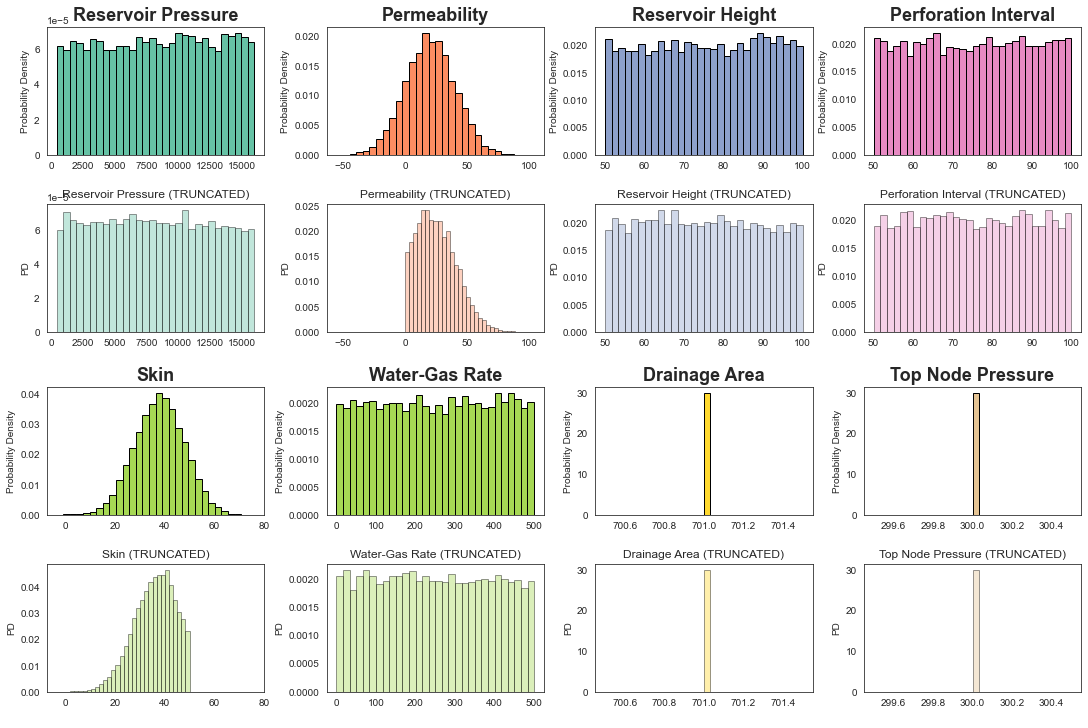

In [35]:
fig, AX = plt.subplots(nrows = 4, ncols=4, figsize=(15,10), layout ='constrained')

#cmap = matplotlib.cm.get_cmap('rocket')
cmap = sns.color_palette('Set2', as_cmap=True)

icolor = 0.1
i_samples = 10000
i_col = 0
i_row = 0
for key in Input_var_dict.keys():
    

    RBG = cmap(icolor)[0],cmap(icolor)[1],cmap(icolor)[2]
    icolor = icolor + 0.1
    
    i_mean, i_SD = Input_var_dict[key][2], Input_var_dict[key][3]
    i_Low_limit, i_High_limit = Input_var_dict[key][0], Input_var_dict[key][1]
    i_constant = Input_var_dict[key][4]
    i_x_Label, i_Title = Input_var_dict[key][6], Input_var_dict[key][6]
    i_Dist_Type = Input_var_dict[key][5]

    Generate_normal_and_Truncated(i_mean, i_SD, i_samples, i_Low_limit, i_High_limit, i_constant, i_x_Label, i_Title, i_col,i_row, i_Dist_Type)
    
    i_col = i_col + 1
    if i_col > 3:
        i_col = 0
        i_row = 2


# Import production test history data 
Production test data will be used to validate results from well model (WHP/Qg production test vs well model results) <br>
Choke values from production test can be used on well model calculation

In [5]:
use_PDP_hist = False

if use_PDP_hist == True:

    df_PDP_hist = pd.read_csv ('comp_PDP_data.csv', delimiter=',')
    df_PDP_hist['Gas'] = df_PDP_hist['Gas'].div(1000)


    ## drop rows if requiered. Else, comment next 2 lines
    indexAge = df_PDP_hist[ (df_PDP_hist['Gas'] >= 3)].index
    df_PDP_hist.drop(indexAge , inplace=True)

    # Show DataFrame
    df_PDP_hist.describe().round(2)

# Well Choke input

In [6]:
# Specify if Chokes from Production Test (history) are used as input for PROSPER
use_PT_choke = False 

if use_PT_choke == True:
    CK_PT_list = df_PDP_hist['Choke'].unique() # Extract Choke List from production test (history) data
    print('Chokes from Production Test (history) = ', CK_PT_list)

# Specify choke values to be used on well model (PROSPER). 
Choke_list = [8,10,12,14,16,18,20,22,24,26,28,30,32,40,64,104]
Choke_list = [40]

print('Choke list from user = ', Choke_list)



if use_PT_choke == True:
    Choke_list = CK_PT_list

print('Chokes to be used on PROSPER = ', Choke_list)

Choke list from user =  [40]
Chokes to be used on PROSPER =  [40]


<div class="alert alert-success">
<font color='blue'>
    
# VLP correlation
Specify if VLP correlation will be used as variable for each iteration
***
</font>
Cell 19
</div>

In [7]:
### if VLP_corr_status = true, each iteration will have different VLP correlation 

VLP_corr_status = True

VLP_index_list = [0,1,2,4,5,8,9,10,11,12,14,18,19]
print('Total number of correlations = ',len(VLP_index_list), '\n')

VLP_names = ['DunsandRosModified', 'HagedornBrown', 'FancherBrown', 'MukerjeeBrill', 'BeggsandBrill', \
             'PetroleumExperts', 'Orkiszewski', 'PetroleumExperts2', 'DunsandRosOriginal', 'PetroleumExperts3', \
             'GREmodifiedbyPE', 'PetroleumExperts4', 'Hydro3P']

xii  = 0
for xi in VLP_names:
    print(VLP_index_list[xii], VLP_names[xii] )
    xii = xii + 1


Total number of correlations =  13 

0 DunsandRosModified
1 HagedornBrown
2 FancherBrown
4 MukerjeeBrill
5 BeggsandBrill
8 PetroleumExperts
9 Orkiszewski
10 PetroleumExperts2
11 DunsandRosOriginal
12 PetroleumExperts3
14 GREmodifiedbyPE
18 PetroleumExperts4
19 Hydro3P


## **Exclude Correlations: GREmodifiedbyPE and PetroleumExperts4 <br>**
**These correlations take longer time to calculate. Running the next cell wil exclude these two correlations**

Total number of correlations =  11 

0 DunsandRosModified
1 HagedornBrown
2 FancherBrown
4 MukerjeeBrill
5 BeggsandBrill
8 PetroleumExperts
9 Orkiszewski
10 PetroleumExperts2
11 DunsandRosOriginal
12 PetroleumExperts3
19 Hydro3P


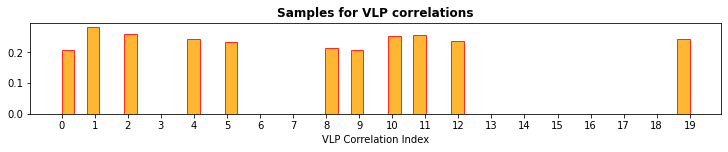

In [8]:
VLP_corr_status = True

VLP_index_list = [0,1,2,4,5,8,9,10,11,12,19]
print('Total number of correlations = ',len(VLP_index_list), '\n')

VLP_names = ['DunsandRosModified', 'HagedornBrown', 'FancherBrown', 'MukerjeeBrill', 'BeggsandBrill', \
             'PetroleumExperts', 'Orkiszewski', 'PetroleumExperts2', 'DunsandRosOriginal', 'PetroleumExperts3', \
              'Hydro3P']

      

xii  = 0
for xi in VLP_names:
    print(VLP_index_list[xii], VLP_names[xii] )
    xii = xii + 1

# Plot histogram for Correlations Index
VLP_Index_sample = np.random.choice(VLP_index_list, 1000)
fig, ax = plt.subplots(nrows = 1, ncols=1, figsize=(10,2), layout ='constrained')

ax.hist(VLP_Index_sample, bins=50, density=True, align='mid', color=c_orange, alpha=0.8, edgecolor = "red");
ax.set_xlabel('VLP Correlation Index', color='black')
ax.set_title('Samples for VLP correlations', weight='bold', color='black')

x = range(0,20,1);
ax.set_xticks(range(len(x)), x);

<div class="alert alert-success">
<font color='blue'>
 
# 4. Start Calculations for Sensitivity Analysis

1. Generate input variables based on distributions
2. Send the input variables from Jupyter Notebook to Well model (PROSPER)
3. Update Well IPR
4. Calculate Well Model (solve for VLP and IPR)
5. Import results from Well Model (PROSPER) to Jupyter Notebook. Results are saved inside dictionary variables
    
***
</font>   
Cell 23
</div>

In [9]:
def Generate_rand_val(var_name, test_val=0):

    i_mean, i_SD = Input_var_dict[var_name][2], Input_var_dict[var_name][3]
    i_Low_limit, i_High_limit = Input_var_dict[var_name][0], Input_var_dict[var_name][1]
    i_constant = Input_var_dict[var_name][4]
    i_x_Label, i_Title = Input_var_dict[var_name][6], Input_var_dict[var_name][6]
    i_Dist_Type = Input_var_dict[var_name][5]
        
    ## generate data for truncated normal distribution
    if i_Dist_Type == 'Constant':
        NT_Samples = i_constant
        
    if i_Dist_Type == 'Uniform':
        NT_Samples = np.random.uniform(low = i_Low_limit, high = i_High_limit, size = 1)
        
    if i_Dist_Type == 'Normal':
        NT_Samples = stats.truncnorm.rvs((i_Low_limit-i_mean)/i_SD,(i_High_limit-i_mean)/i_SD, loc=i_mean, scale=i_SD, size=1)
    
    if var_name=='Perf':
        if test_val < NT_Samples:
            #print(test_val)
            NT_Samples = test_val
    
    #print(NT_Samples)
    if NT_Samples < 1:
        NT_Samples = np.around(NT_Samples,4)
    else:
        NT_Samples = np.around(NT_Samples,1)
    
    ## Save input values in dictionary
    if i_Dist_Type == 'Constant':    
        my_dict_input_vals[var_name].extend([NT_Samples])
    else:
        my_dict_input_vals[var_name].extend(NT_Samples)   #Save input values in dictionary
    
    return NT_Samples

In [10]:
## Create dictionary variable to generate results dataframe
vars_list = ['Index', 'Reservoir Pressure','Drainage Area', 'Permeability', 'Reservoir Thickness', 'Perforation Interval',
            'Skin','Water-Gas Rate', 'Top Node Pressure','VLP Index','VLP Name', 'Choke',
            'Gas Rate', 'Water Rate', 'Flowing Bottom Hole Pressure', 'Well Head Pressure', 'Absolute Open Flow']

Abrev_list = ['', 'Pr','DA', 'k', 'h', 'Perf',
            'S','WGR', 'Top_Press','','', 'Ck',
            'Qg', 'Qw', 'FBHP', 'WHP', 'AOF']

Value_list = ['', '','', '', '', '',
            '','', '','','', '',
            '', '', '', '', '']

Units_list = ['', 'psi','acres', 'mD', 'm', 'm',
            '','bbl/MMscf', 'psi','','', 'n/64in',
            'MMscfd', 'bpd', 'psi', 'psi', 'MMscfd']

var_labels_dic = {
 'Variable': vars_list,
 'Abreviation': Abrev_list,
 'Value': Value_list,
 'Units': Units_list,
}

#var_labels_dic
df_var_labels = pd.DataFrame(var_labels_dic)
#df_var_labels 

## Comment one of the next two lines based on how you want to visualize the results while iterations are calculated

In [13]:
Results_display_Type = 'Only Text'
#Results_display_Type = 'Plots + DF'

def print_input_and_solutions():
    if Results_display_Type == 'Plots + DF':
        Value_list =[
            i,my_dict_input_vals['Pr'][i], my_dict_input_vals['DA'][i], my_dict_input_vals['k'][i], my_dict_input_vals['h'][i],
            my_dict_input_vals['Perf'][i], my_dict_input_vals['S'][i], my_dict_input_vals['WGR'][i], 
            my_dict_input_vals['Top_Press'][i], VLP_Index_sample, VLP_Index_sample_Name, Choke, Gas_Sol, BHP_Sol, WHP_Sol,Water_Sol, 
            Gas_AOF
        ]

        var_labels_dic = {
         'Variable': vars_list,
         'Abreviation': Abrev_list,
         'Value': Value_list,
         'Units': Units_list,
        }

        df_var_labels = pd.DataFrame(var_labels_dic)
        #display(df_var_labels)


        ## Plot Solution
        fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(8,2), layout ='constrained')

        x = my_dict[str(i) + '_G']
        y = my_dict[str(i) + '_IPR']
        df_vlp = pd.DataFrame(my_dict)
        df_vlp.replace(0, np.nan, inplace=True)
        y2=df_vlp[str(i) + '_VLP']
        #ax.scatter(x,y,marker='.', color=(255/255, 140/255, 0/255), s= 100, alpha=0.5, clip_on=True, linestyle='dashed')

        ax[0].plot(x,y,'.g-')
        ax[0].plot(x,y2,'.b-')
        ax[0].scatter(x=Gas_Sol,y=BHP_Sol,marker='.', color='black', s= 300, alpha=1, clip_on=False)

        ax[0].set_title('VLP vs IPR', weight='bold', color='black', fontsize=8)
        ax[0].set_ylabel('Pressure', fontsize=8)
        ax[0].set_xlabel('Gas Rate', fontsize=8)
        ax[0].tick_params(axis='x', labelsize=8)
        ax[0].tick_params(axis='y', labelsize=8)
        ax[0].set_ylim(0,Input_var_dict['Pr'][1]+1000)
        ax[0].set_xlim(0,None)

        ax[2].hist(my_dict_input_vals['Sol_Gas'], bins=50, density=True, align='mid', color=c_orange, alpha=0.8, edgecolor = "red");

        ax[2].set_title('Gas Rate Distribution', weight='bold', color='black', fontsize=8)
        ax[2].set_xlabel('Gas Rate', fontsize=8)
        ax[2].set_ylabel('PD', fontsize=8)
        ax[2].tick_params(axis='x', labelsize=8)
        ax[2].yaxis.tick_right()
        ax[2].get_yaxis().set_visible(False)

        # Plot density map
        df_densityP = pd.DataFrame(my_dict_input_vals)
        if i > 2:
            sns.kdeplot(x=df_densityP['Sol_Gas'], y=df_densityP['FBHP'], fill=True, alpha=0.7, ax=ax[1], 
                        cmap='coolwarm', label='PROSPER density map', thresh=0)

            ax[1].set_title('Solution Density Map', weight='bold', color='black', fontsize=8)
            ax[1].set_xlabel('Gas Rate', fontsize=8)
            ax[1].set_ylabel('Pressure', fontsize=8)
            ax[1].yaxis.set_label_position("left")
            ax[1].yaxis.tick_left()
            ax[1].tick_params(axis='both', labelsize=8)
            ax[1].get_yaxis().set_visible(False)

        plt.show()

        display(df_var_labels.style.set_properties(subset=['Value'], **{'width': '200px'}))
    
    ### Display results as text (FASTER)
    else:
        print('Index: ', i)
        print('Reservoir Pressure = ', my_dict_input_vals['Pr'][i])
        print('Drainage Area = ', my_dict_input_vals['DA'][i])
        print('Permeability = ', my_dict_input_vals['k'][i])
        print('Reservoir thickness = ', my_dict_input_vals['h'][i])
        print('Perforation Interval = ', my_dict_input_vals['Perf'][i])
        print('SKIN = ', my_dict_input_vals['S'][i])
        print('WGR = ', my_dict_input_vals['WGR'][i])
        print('Top Node Pressure = ', my_dict_input_vals['Top_Press'][i])

        print('VLP Correlation Index = ', VLP_Index_sample, VLP_Index_sample_Name) 
        print('Choke = ', Choke, '\n')


        print('------')

        print('Gas Rate = ', str(round(Gas_Sol,3)), ' MMscfd')
        print('Pressure = ', str(round(BHP_Sol,1)), ' psi')
        print('WHP = ', str(round(WHP_Sol,1)), ' psi')
        print('AOF = ', Gas_AOF) 
        print('------')
    
    
    
    
    
    if i < iter-1:
        clear_output(wait=True)

In [36]:

import time

start = time.time()

iter = 1000 ## Set iterations


## Create Dictionaries to fill inputs, results ##
## Everytime this cell is run the dictionary variables are reset ##

my_dict = defaultdict(list)          # dictionary to save VLP and IPR Curves
my_dict_input_vals = defaultdict(list) # dictionary to save Inputs/Solutions 


## Check if OpenServer Lic is open
if 'c' in locals():
    print('c is active')
else:
    c = OpenServer()
    
c.connect()


n = range(iter)

for i in n:
    
    #print('Index: ', i)
        
    Rand_val = Generate_rand_val('Pr') ## Reservoir Pressure ##
    c.DoSet('PROSPER.SIN.IPR.Single.Pres', Rand_val) # Change variable on PROSPER
    
    Rand_val = Generate_rand_val('DA') ### DRAINAGE AREA ###
    c.DoSet('PROSPER.SIN.IPR.Single.Drainage', Rand_val) # Change variable on PROSPER    
    
    Rand_val = Generate_rand_val('k') ### PERMEABILITY ###
    c.DoSet('PROSPER.SIN.IPR.Single.ResPerm', Rand_val) # Change variable on PROSPER       
    
    Rand_val = Generate_rand_val('h') ### Reservoir Height ###
    c.DoSet('PROSPER.SIN.IPR.Single.Thickness', Rand_val) # Change variable on PROSPER     
    #test_val = Rand_val
    
    Rand_val = Generate_rand_val('Perf', Rand_val) ## Perforation Interval ##
    c.DoSet('PROSPER.SIN.IPR.Single.PerfInt', Rand_val) # Change variable on PROSPER      
   
    Rand_val = Generate_rand_val('S') ### SKIN ###
    c.DoSet('PROSPER.SIN.IPR.Single.Skin', Rand_val) # Change variable on PROSPER    
 
    Rand_val = Generate_rand_val('WGR') ### WGR ###
    c.DoSet('PROSPER.SIN.IPR.Single.WGR', Rand_val) # Change variable on PROSPER  
    c.DoSet('PROSPER.ANL.SYS.WGR', Rand_val) # Change variable on PROSPER  
    
    Rand_val = Generate_rand_val('Top_Press') ### WGR ###
    c.DoSet('PROSPER.ANL.SYS.Pres', Rand_val) # Change variable on PROSPER  

  


    ### VLP Correlation ###
    if VLP_corr_status == True:
        VLP_Index_sample = np.random.choice(VLP_index_list, 1)
        
        
        index_vlp = VLP_index_list.index(VLP_Index_sample)
        VLP_Index_sample_Name = VLP_names[index_vlp]
        VLP_Index_sample_Name =[VLP_Index_sample_Name]
        
        my_dict_input_vals['VLP_Corr'].extend(VLP_Index_sample)
        my_dict_input_vals['VLP_Corr_Name'].extend(VLP_Index_sample_Name)
        
        c.DoSet('PROSPER.ANL.SYS.TubingLabel', VLP_Index_sample)
          
    else:
        my_dict_input_vals['VLP_Corr'].extend(100)
        my_dict_input_vals['VLP_Corr_Name'].extend(100)
        

        
    ### WELL CHOKE ###
    Choke = np.random.choice(Choke_list, 1)      
    my_dict_input_vals['Choke'].extend(Choke)         
    c.DoSet('PROSPER.SIN.EQP.Surf.Data[1].ID', Choke/64)
    
    
    
    ### Calculate new IPR ### Required after changing IPR variables ###
    c.DoCmd('PROSPER.IPR.CALC')
    
    
    
    ## Calculate Well model 
    c.DoCmd('PROSPER.ANL.SYS.CALC')

    ## Extract Solution from PROSPER
    ## Some variable strings change based on PROSPER version
    Gas_Curve = c.DoGet('PROSPER.OUT.SYS.Results[0].GasRate[$]')
    IPR_Curve = c.DoGet('PROSPER.OUT.SYS.Results[0].IPRpres[$]')
    VLP_Curve = c.DoGet('PROSPER.OUT.SYS.Results[0].VLPpres[$]')
    
    Gas_Sol = c.DoGet('PROSPER.OUT.SYS.Results[0].Sol.GasRate')
    BHP_Sol = c.DoGet('PROSPER.OUT.SYS.Results[0].Sol.BHP')
    
    #WHP_Sol = c.DoGet('PROSPER.OUT.SYS.SOL[0].WHP')  
    WHP_Sol = c.DoGet('PROSPER.OUT.SYS.Results[0].Sol.WHPressure') 
    
    #Water_Sol = c.DoGet('PROSPER.OUT.SYS.SOL[0].QWAT')
    Water_Sol = c.DoGet('PROSPER.OUT.SYS.Results[0].Sol.WatRate')
    
    Gas_AOF = c.DoGet('Prosper.SIN.IPR.Single.AOF')
    
    
    if Gas_Sol > 1000000:
        Gas_Sol = 0
        BHP_Sol = 0
        WHP_Sol = 0
        Water_Sol = 0
        
    # Add solutions to dictionary
    my_dict_input_vals['Sol_Gas'].extend([Gas_Sol])
    my_dict_input_vals['FBHP'].extend([BHP_Sol])
    my_dict_input_vals['Sol_WHP'].extend([WHP_Sol])
    my_dict_input_vals['Sol_Water'].extend([Water_Sol])
        
    ## Add  VLP + IPR to Dictionary
    my_dict[str(i) + '_G'].extend(Gas_Curve)
    my_dict[str(i) + '_IPR'].extend(IPR_Curve)
    my_dict[str(i) + '_VLP'].extend(VLP_Curve)
    
    
    # Print values while iterating
    if Gas_Sol > 0:
        print_input_and_solutions()

    
c.disconnect

end = time.time()
print('Total Time (seconds): ',end - start) # time in seconds

Index:  999
Reservoir Pressure =  9238.7
Drainage Area =  701
Permeability =  29.7
Reservoir thickness =  84.1
Perforation Interval =  84.1
SKIN =  26.0
WGR =  166.4
Top Node Pressure =  300
VLP Correlation Index =  [5] ['BeggsandBrill']
Choke =  [40] 

------
Gas Rate =  20.244  MMscfd
Pressure =  8528.8  psi
WHP =  4580.1  psi
AOF =  183.860809326
------
Total Time (seconds):  92.95405673980713


<div class="alert alert-success">
<font color='blue'>
    
# Convert dictionaries to Data Frames + save data as .csv files
    
***
</font>
Cell 26
</div>

In [37]:

df_VLP_IPR = pd.DataFrame(my_dict)                 # VLP and IPR

df_Input_All = pd.DataFrame(my_dict_input_vals)    # Input for all iterations

 # Input for iteration with solution 
df_Input_sol = df_Input_All.copy()
df_Input_sol = df_Input_sol[df_Input_sol['Sol_Gas'] > 0]
df_Input_sol = df_Input_sol.reset_index(drop=True)

# Input for iterations without solution
df_Input_No_sol = df_Input_All.copy()
df_Input_No_sol = df_Input_No_sol[df_Input_No_sol['Sol_Gas'] == 0]
df_Input_No_sol = df_Input_No_sol.reset_index(drop=True)

### Save Data Frames as .csv ###

df_VLP_IPR.to_csv("VLP_IPR.csv",index=False)

df_Input_All.to_csv("Input_ALL_solutiones.csv",index=False)
df_Input_sol.to_csv("Input_with_solutions.csv",index=False)
df_Input_No_sol.to_csv("Input_No_solutions.csv",index=False)



<div class="alert alert-success">
<font color='blue'>
    
# 5. Run the next cell to import saved .csv files
This will allow to continue working with saved results/inputs without running PROSPER again. <br>
It is still requiered to run cell 1 (import libraries)
    
***
</font>
Cell 26
</div>


In [23]:
df_VLP_IPR = pd.read_csv ('VLP_IPR.csv')                    # VLP and IPR

df_Input_All = pd.read_csv ('Input_ALL_solutiones.csv')     # Input for all iterations
df_Input_sol = pd.read_csv ('Input_with_solutions.csv')     # Input for iteration with solution 
df_Input_No_sol = pd.read_csv ('Input_No_solutions.csv')    # Input for iterations without solution

iter = df_Input_All.shape[0]
i = iter
print('No. Iterations = ',iter)

No. Iterations =  1000


<div class="alert alert-success">
<font color='blue'>
    
# 6. Check Info and Values
    
***
</font>
Cell 26
</div>

In [38]:
n_val = 10
display(Markdown(f"## Info + Values - All Iterations"))
df_Input_All.info()
display(df_Input_All.head(n_val+1).round(2))
print(' ')

display(Markdown(f"## Info + Values - Solutions"))
df_Input_sol.info()
display(df_Input_sol.head(n_val+1).round(2))
print(' ')


display(Markdown(f"## Info + Values - NO Solutions"))
df_Input_No_sol.info()
df_Input_No_sol.head(n_val+1).round(2)

## Info + Values - All Iterations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pr             1000 non-null   float64
 1   DA             1000 non-null   int32  
 2   k              1000 non-null   float64
 3   h              1000 non-null   float64
 4   Perf           1000 non-null   float64
 5   S              1000 non-null   float64
 6   WGR            1000 non-null   float64
 7   Top_Press      1000 non-null   int32  
 8   VLP_Corr       1000 non-null   int32  
 9   VLP_Corr_Name  1000 non-null   object 
 10  Choke          1000 non-null   int32  
 11  Sol_Gas        1000 non-null   float64
 12  FBHP           1000 non-null   float64
 13  Sol_WHP        1000 non-null   float64
 14  Sol_Water      1000 non-null   float64
dtypes: float64(10), int32(4), object(1)
memory usage: 101.7+ KB


,Pr,DA,k,h,Perf,S,WGR,Top_Press,VLP_Corr,VLP_Corr_Name,Choke,Sol_Gas,FBHP,Sol_WHP,Sol_Water
0,5094.9,701,10.3,83.7,83.7,41.5,58.8,300,12,PetroleumExperts3,40,11.63,3146.81,1766.97,684.00
1,3920.0,701,22.5,74.5,53.9,35.5,480.2,300,10,PetroleumExperts2,40,4.21,3600.23,1243.14,2020.13
2,5533.5,701,11.8,95.0,78.6,34.1,353.5,300,11,DunsandRosOriginal,40,7.61,4769.62,2040.45,2690.65
3,15696.2,701,5.6,54.4,54.4,41.9,286.8,300,11,DunsandRosOriginal,40,16.46,7954.38,4571.08,4721.32
4,11639.1,701,4.2,57.3,53.4,45.4,484.4,300,9,Orkiszewski,40,9.27,5939.42,3022.01,4491.68
5,15215.8,701,22.6,64.1,64.1,24.4,132.2,300,5,BeggsandBrill,40,33.59,13153.28,8130.41,4440.95
6,7144.0,701,33.6,65.5,65.5,33.4,47.1,300,2,FancherBrown,40,24.46,5946.72,3890.04,1152.02
7,685.6,701,8.9,54.2,54.2,27.4,388.5,300,5,BeggsandBrill,40,0.00,0.00,0.00,0.00
8,7611.0,701,24.4,57.5,57.5,36.7,174.3,300,5,BeggsandBrill,40,14.40,6419.42,3058.21,2509.51
9,8465.0,701,44.1,69.5,52.8,37.8,219.4,300,8,PetroleumExperts,40,17.92,7769.79,4437.78,3931.44


## Info + Values - Solutions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pr             909 non-null    float64
 1   DA             909 non-null    int32  
 2   k              909 non-null    float64
 3   h              909 non-null    float64
 4   Perf           909 non-null    float64
 5   S              909 non-null    float64
 6   WGR            909 non-null    float64
 7   Top_Press      909 non-null    int32  
 8   VLP_Corr       909 non-null    int32  
 9   VLP_Corr_Name  909 non-null    object 
 10  Choke          909 non-null    int32  
 11  Sol_Gas        909 non-null    float64
 12  FBHP           909 non-null    float64
 13  Sol_WHP        909 non-null    float64
 14  Sol_Water      909 non-null    float64
dtypes: float64(10), int32(4), object(1)
memory usage: 92.4+ KB


,Pr,DA,k,h,Perf,S,WGR,Top_Press,VLP_Corr,VLP_Corr_Name,Choke,Sol_Gas,FBHP,Sol_WHP,Sol_Water
0,5094.9,701,10.3,83.7,83.7,41.5,58.8,300,12,PetroleumExperts3,40,11.63,3146.81,1766.97,684.00
1,3920.0,701,22.5,74.5,53.9,35.5,480.2,300,10,PetroleumExperts2,40,4.21,3600.23,1243.14,2020.13
2,5533.5,701,11.8,95.0,78.6,34.1,353.5,300,11,DunsandRosOriginal,40,7.61,4769.62,2040.45,2690.65
3,15696.2,701,5.6,54.4,54.4,41.9,286.8,300,11,DunsandRosOriginal,40,16.46,7954.38,4571.08,4721.32
4,11639.1,701,4.2,57.3,53.4,45.4,484.4,300,9,Orkiszewski,40,9.27,5939.42,3022.01,4491.68
5,15215.8,701,22.6,64.1,64.1,24.4,132.2,300,5,BeggsandBrill,40,33.59,13153.28,8130.41,4440.95
6,7144.0,701,33.6,65.5,65.5,33.4,47.1,300,2,FancherBrown,40,24.46,5946.72,3890.04,1152.02
7,7611.0,701,24.4,57.5,57.5,36.7,174.3,300,5,BeggsandBrill,40,14.40,6419.42,3058.21,2509.51
8,8465.0,701,44.1,69.5,52.8,37.8,219.4,300,8,PetroleumExperts,40,17.92,7769.79,4437.78,3931.44
9,2576.8,701,14.6,57.3,57.3,47.7,284.5,300,8,PetroleumExperts,40,2.82,1819.16,644.33,803.03


## Info + Values - NO Solutions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pr             91 non-null     float64
 1   DA             91 non-null     int32  
 2   k              91 non-null     float64
 3   h              91 non-null     float64
 4   Perf           91 non-null     float64
 5   S              91 non-null     float64
 6   WGR            91 non-null     float64
 7   Top_Press      91 non-null     int32  
 8   VLP_Corr       91 non-null     int32  
 9   VLP_Corr_Name  91 non-null     object 
 10  Choke          91 non-null     int32  
 11  Sol_Gas        91 non-null     float64
 12  FBHP           91 non-null     float64
 13  Sol_WHP        91 non-null     float64
 14  Sol_Water      91 non-null     float64
dtypes: float64(10), int32(4), object(1)
memory usage: 9.4+ KB


,Pr,DA,k,h,Perf,S,WGR,Top_Press,VLP_Corr,VLP_Corr_Name,Choke,Sol_Gas,FBHP,Sol_WHP,Sol_Water
0,685.6,701,8.90,54.2,54.2,27.4,388.5,300,5,BeggsandBrill,40,0.0,0.0,0.0,0.0
1,1532.1,701,22.10,63.9,60.9,21.7,112.1,300,9,Orkiszewski,40,0.0,0.0,0.0,0.0
2,533.6,701,24.40,73.0,66.3,47.6,124.3,300,1,HagedornBrown,40,0.0,0.0,0.0,0.0
3,777.2,701,14.10,97.3,79.3,17.0,492.9,300,19,Hydro3P,40,0.0,0.0,0.0,0.0
4,721.4,701,25.30,70.3,55.1,34.8,322.8,300,1,HagedornBrown,40,0.0,0.0,0.0,0.0
5,1773.8,701,19.80,63.6,63.6,13.7,284.1,300,9,Orkiszewski,40,0.0,0.0,0.0,0.0
6,1560.9,701,32.30,94.2,60.8,36.4,361.1,300,9,Orkiszewski,40,0.0,0.0,0.0,0.0
7,473.7,701,37.00,65.7,51.7,22.2,388.8,300,1,HagedornBrown,40,0.0,0.0,0.0,0.0
8,476.0,701,0.15,87.2,82.6,37.4,227.2,300,2,FancherBrown,40,0.0,0.0,0.0,0.0
9,1164.3,701,6.10,69.3,62.2,36.9,379.4,300,8,PetroleumExperts,40,0.0,0.0,0.0,0.0


<div class="alert alert-success">
<font color='blue'>
    
# 6. Check Statistics
    
***
</font>
Cell 26
</div>

In [39]:
## Show how many solutions are = 0
Iterations_No_Sol = (df_Input_All['Sol_Gas'] == 0).sum()
It_with_Sol = (df_Input_All['Sol_Gas'] > 0).sum()

perc_No_Sol = Iterations_No_Sol/(Iterations_No_Sol+It_with_Sol)*100
perc_with_Sol = 100 - perc_No_Sol

print('* Total Iterations = ', i+1)
print('* Iterations NO Solution =', Iterations_No_Sol, '(',perc_No_Sol.round(2),'%)' )
print('* Iterations with Solution =', It_with_Sol, '(',perc_with_Sol.round(2),'%)' )


### Compare Stadistics ###
CL1 = df_Input_All.columns.tolist()
CL2 = df_Input_sol.columns.tolist()
CL3 = df_Input_No_sol.columns.tolist()
CL1.remove('VLP_Corr_Name')
CL2.remove('VLP_Corr_Name')
CL3.remove('VLP_Corr_Name')

df1 = pd.DataFrame(df_Input_All.describe(percentiles=[0.1,.2, .4, .6, .8,0.9]), columns=CL1)
df2 = pd.DataFrame(df_Input_sol.describe(percentiles=[0.1,.2, .4, .6, .8,0.9]), columns=CL2)
df3 = pd.DataFrame(df_Input_No_sol.describe(percentiles=[0.1,.2, .4, .6, .8,0.9]), columns=CL3)


display(Markdown(f"## Statistics - All Iterations"))
display(df1.round(2))
print(' ')
display(Markdown(f"## Statistics - Solutions"))
display(df2.round(2))
print(' ')
display(Markdown(f"## Statistics - NO Solutions"))
display(df3.round(2))


* Total Iterations =  1000
* Iterations NO Solution = 91 ( 9.1 %)
* Iterations with Solution = 909 ( 90.9 %)


## Statistics - All Iterations

,Pr,DA,k,h,Perf,S,WGR,Top_Press,VLP_Corr,Choke,Sol_Gas,FBHP,Sol_WHP,Sol_Water
count,1000.00,1000.0,1000.00,1000.00,1000.00,1000.00,1000.00,1000.0,1000.00,1000.0,1000.00,1000.00,1000.00,1000.00
mean,8226.03,701.0,25.39,75.21,67.37,35.73,255.47,300.0,7.63,40.0,14.86,6573.35,3774.40,3174.75
std,4436.81,0.0,15.11,14.30,12.02,8.44,142.97,0.0,5.39,0.0,11.10,4063.16,2788.34,2588.71
min,414.40,701.0,0.03,50.00,50.00,5.80,2.10,300.0,0.00,40.0,0.00,0.00,0.00,0.00
10%,1931.91,701.0,6.19,55.30,53.10,24.40,55.96,300.0,1.00,40.0,0.48,854.71,307.45,9.86
20%,3760.32,701.0,10.96,60.60,55.60,28.60,107.78,300.0,2.00,40.0,4.23,2656.68,930.68,680.38
40%,6746.14,701.0,20.46,70.96,62.00,34.00,209.48,300.0,5.00,40.0,10.86,5180.98,2538.97,1901.11
50%,8370.80,701.0,24.40,75.20,65.35,36.40,262.40,300.0,8.00,40.0,13.90,6550.92,3457.10,2612.90
60%,9857.16,701.0,28.30,80.40,68.94,38.74,309.36,300.0,9.00,40.0,16.49,7806.61,4404.92,3544.19
80%,12631.38,701.0,37.92,89.82,79.20,43.62,400.76,300.0,11.00,40.0,24.02,10579.40,6487.00,5685.48


## Statistics - Solutions

,Pr,DA,k,h,Perf,S,WGR,Top_Press,VLP_Corr,Choke,Sol_Gas,FBHP,Sol_WHP,Sol_Water
count,909.00,909.0,909.00,909.00,909.00,909.00,909.00,909.0,909.00,909.0,909.00,909.00,909.00,909.00
mean,8899.74,701.0,25.66,75.09,67.36,35.73,251.77,300.0,7.63,40.0,16.35,7231.40,4152.26,3492.57
std,4075.37,0.0,15.22,14.32,12.07,8.48,142.57,0.0,5.42,0.0,10.54,3660.59,2642.61,2502.36
min,588.40,701.0,0.03,50.00,50.00,5.80,2.10,300.0,0.00,40.0,0.00,461.47,300.00,0.18
10%,3406.38,701.0,6.30,55.20,53.08,24.36,55.56,300.0,1.00,40.0,3.61,2350.59,792.34,586.97
20%,4769.98,701.0,11.00,60.10,55.60,28.56,105.50,300.0,2.00,40.0,6.40,3641.83,1470.89,1048.21
40%,7683.32,701.0,20.72,71.00,61.80,33.92,201.76,300.0,5.00,40.0,12.69,5848.37,3009.40,2268.31
50%,8986.20,701.0,24.80,75.30,65.20,36.40,257.30,300.0,8.00,40.0,15.11,7158.84,3926.41,3095.08
60%,10360.76,701.0,28.60,80.48,68.80,38.80,304.70,300.0,9.00,40.0,17.79,8267.80,4798.73,3839.02
80%,12813.02,701.0,38.60,89.70,79.50,43.64,399.40,300.0,11.00,40.0,25.13,10745.57,6733.60,5903.26


## Statistics - NO Solutions

,Pr,DA,k,h,Perf,S,WGR,Top_Press,VLP_Corr,Choke,Sol_Gas,FBHP,Sol_WHP,Sol_Water
count,91.00,91.0,91.00,91.00,91.00,91.00,91.00,91.0,91.00,91.0,91.0,91.0,91.0,91.0
mean,1496.43,701.0,22.64,76.40,67.43,35.76,292.47,300.0,7.62,40.0,0.0,0.0,0.0,0.0
std,754.48,0.0,13.77,14.08,11.60,8.10,142.49,0.0,5.08,0.0,0.0,0.0,0.0,0.0
min,414.40,701.0,0.15,50.10,50.10,13.70,6.60,300.0,0.00,40.0,0.0,0.0,0.0,0.0
10%,590.00,701.0,6.10,58.00,54.00,26.00,74.20,300.0,1.00,40.0,0.0,0.0,0.0,0.0
20%,795.50,701.0,9.80,63.40,55.70,29.40,148.60,300.0,2.00,40.0,0.0,0.0,0.0,0.0
40%,1192.60,701.0,17.30,70.30,62.50,34.10,283.80,300.0,5.00,40.0,0.0,0.0,0.0,0.0
50%,1383.60,701.0,20.50,74.70,66.00,36.00,322.80,300.0,9.00,40.0,0.0,0.0,0.0,0.0
60%,1560.90,701.0,24.40,79.50,69.70,37.40,372.60,300.0,9.00,40.0,0.0,0.0,0.0,0.0
80%,2109.70,701.0,33.80,92.00,77.70,43.50,433.40,300.0,11.00,40.0,0.0,0.0,0.0,0.0


In [40]:
### Check if perforation values are less than reservoir thickness (h). Minimum value must be 0.
h_perf = df_Input_All['h'] - df_Input_All['Perf']
h_perf.describe()


count    1000.000000
mean        7.843100
std        11.437235
min         0.000000
25%         0.000000
50%         0.000000
75%        13.500000
max        48.100000
dtype: float64

<div class="alert alert-success"> <font color='blue'>
    
# 6. ANALYZE RESULTS -  PRESSURE/GAS RATE @ Solution Node
Cell 28
***
</font> </div>

In [ ]:
# RUN MULTIPLE CELLS
Javascript("Jupyter.notebook.execute_cell_range(31,46)")

## Iterations with and without solution (VLP/IPR intersection)
    There are 2 dictionaries/DataFrames containing the results
    df_QP_All = All iterations
    df_QP_sol = Iterations with solution (Qg > 0)

<div class="alert alert-success">
<font color='blue'>
    
# QC SOLUTION (P vs Qg) Data Generated with loop
  
***
</font>
Cell 39
</div>


In [41]:
### Function to generate Plots with distribution for each axis

def Generate_Plots_with_Distribution(x, y_var,Ptype):
    
    y = df_Input_sol[y_var]
    
    fig = plt.figure(figsize=(10,6))
    gs = gridspec.GridSpec(3, 5)

    fig.subplots_adjust(wspace=0.02)
    fig.subplots_adjust(hspace=0.02)

    ax_main = plt.subplot(gs[1:3, :2])
    ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
    ax_yDist = plt.subplot(gs[1:3, 4],sharey=ax_main)
    ax_density = plt.subplot(gs[1:3, 2:4],sharey=ax_main,sharex=ax_main)
    
    ## Y vs X plot
    ax = ax_main
    ax.scatter(x,y,marker='.', color=(255/255, 140/255, 0/255), s= 200, alpha=0.5, clip_on=False)

    ax.set_xlabel('Gas Rate, MMscfd', color=c_red, weight='bold')
    ax.set_ylabel(y_var, color=c_blue, weight='bold')

    ax.set_axisbelow(True)
    ax.grid(color = c_black, linestyle = '--', linewidth = 0.1, zorder=1)

    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)
    #ax.set_ylim(bottom=pmin)

    ax.yaxis.tick_left()
    ax.xaxis.tick_bottom()
    ax.tick_params(axis='x', labelsize=9)
    ax.tick_params(axis='y', labelsize=9)
    
    ### Density Map Y vs X plot ###
    ax = ax_density
    sns.kdeplot(x=x, y=y, fill=True, alpha=0.7, ax=ax, cmap='coolwarm', label='PROSPER density map', thresh=0)
    ax.set_xlabel('Gas Rate, MMscfd', color=c_red, weight='bold')
    ax.tick_params(axis='x', labelsize=8)
    ax.get_yaxis().set_visible(False)
    
    ## X axis Distribution ##
    ax = ax_xDist
    ax.hist(x,bins=int(iter/33),align='mid', color=c_red, alpha=0.5)
    ax.set(ylabel='PD')
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.yaxis.tick_left()
    ax.xaxis.tick_top()

    ## Y axis Distribution ##
    ax = ax_yDist
    ax.hist(y,bins=int(iter/33),orientation='horizontal',align='mid', color=c_blue, alpha=0.5)
    ax.set(xlabel='PD')
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

    ax.invert_xaxis()
    ax.yaxis.tick_right()
    ax.invert_xaxis()

    plt.show()

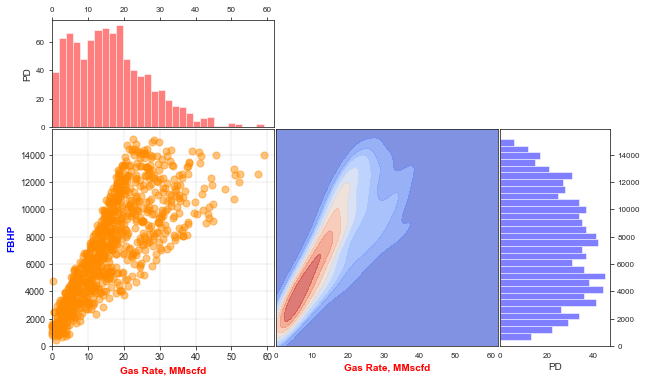

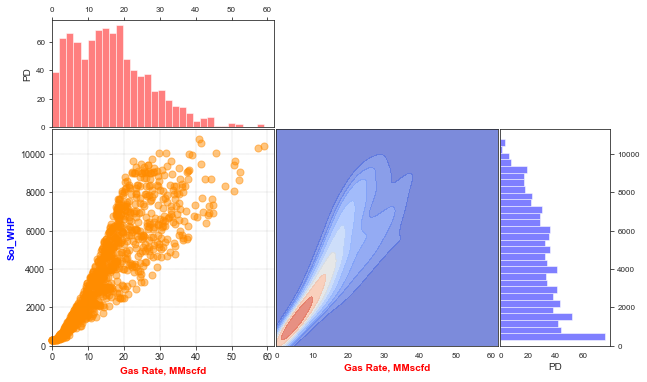

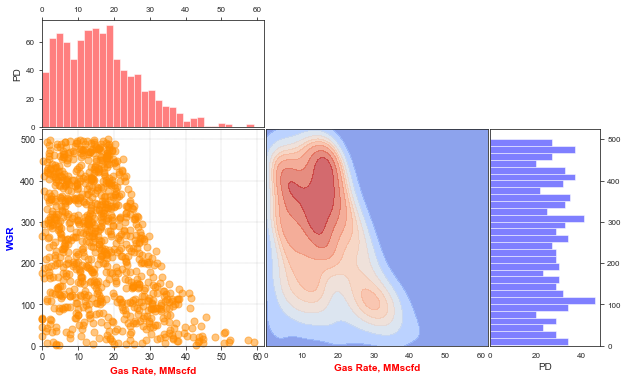

In [42]:
## Specify variables to generate plots: scatter, density map and distributions
Generate_Plots_with_Distribution(df_Input_sol['Sol_Gas'], 'FBHP','Density')
Generate_Plots_with_Distribution(df_Input_sol['Sol_Gas'], 'Sol_WHP','Scatter')
Generate_Plots_with_Distribution(df_Input_sol['Sol_Gas'], 'WGR','Scatter')

<div class="alert alert-success">
<font color='blue'>

    
# Solutions (WHP/Qg) vs VLP correlation

    
***
</font> </div>

## VLP Correlations

,VLP_Index,Corr_Name,VLP_Val_Sum,Color
0,0,DunsandRosModified,77,
1,1,HagedornBrown,68,
2,2,FancherBrown,84,
3,4,MukerjeeBrill,80,
4,5,BeggsandBrill,90,
5,8,PetroleumExperts,91,
6,9,Orkiszewski,65,
7,10,PetroleumExperts2,79,
8,11,DunsandRosOriginal,95,
9,12,PetroleumExperts3,91,


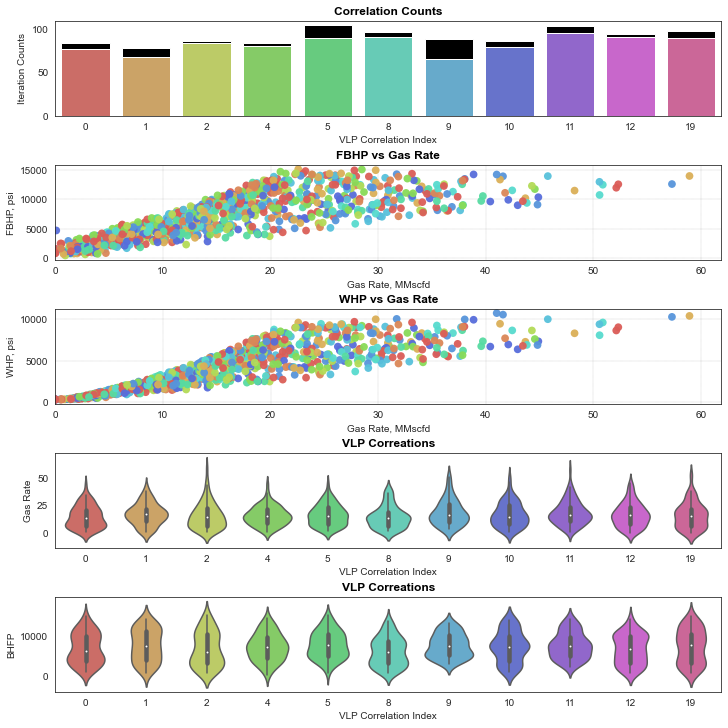

In [43]:
VLP_corr_dict = defaultdict(list) # dictionary to save VLP correlations summary

VLP_index_name =[]
xii  = 0
for xi in VLP_names:   
    vlp_val = str(VLP_index_list[xii]) + ' ' +  str(VLP_names[xii])
    VLP_index_name.append(vlp_val)
    VLP_count = (df_Input_sol['VLP_Corr'] == VLP_index_list[xii]).sum()
    
    VLP_corr_dict['VLP_Index'].extend([VLP_index_list[xii]])
    VLP_corr_dict['Corr_Name'].extend([str(VLP_names[xii])])
    VLP_corr_dict['VLP_Val_Sum'].extend([VLP_count])
    VLP_corr_dict['Color'].extend([''])
    xii = xii + 1

df_VLP_corr = pd.DataFrame(VLP_corr_dict) # convert dictionary to DataFrame

g = pd.Categorical(df_VLP_corr.VLP_Index).codes # convert groups to indices  
n = np.unique(g).size
palette = sns.color_palette("hls", n).as_hex()




display(Markdown(f"## VLP Correlations"))
# apply the colors to style for VLP Correlation
display(
    df_VLP_corr.style.apply(
    lambda x: ['background-color: {}'.format(palette[i]) for i in g], 
    subset=['Color']

))
    


x = df_Input_sol['Sol_Gas']
y = df_Input_sol['FBHP']
y2 = df_Input_sol['Sol_WHP']
xc = df_Input_sol['VLP_Corr']


fig, ax = plt.subplots(nrows = 5, ncols=1, figsize=(10,10), layout ='constrained')

Pal = "hls"


# --- Plot 0 --- Count values on each VLP correlation
nplot = ax[0]

s1 = df_Input_All.pivot_table(columns=['VLP_Corr'], aggfunc='size')
s2 = df_Input_sol.pivot_table(columns=['VLP_Corr'], aggfunc='size')

sns.barplot(ax =nplot, x=s1.index, y=s1.values, color= 'black', alpha=1, dodge=False)
sns.barplot(ax =nplot, x=s2.index, y=s2.values, palette = Pal, hue =s2.index, dodge=False)
nplot.legend_.remove()

nplot.set_title('Correlation Counts', weight='bold', color=c_black)
nplot.set_xlabel('VLP Correlation Index')
nplot.set_ylabel('Iteration Counts')

# --- Plot 1 ---
sns.set_style("white")

nplot = ax[1]
sns.scatterplot(ax=nplot, x = x, y = y, alpha=0.95, s = 60, hue = xc, palette=Pal, linewidth=0, edgecolor='black', legend=False)
nplot.set_title('FBHP vs Gas Rate', weight='bold', color=c_black)
nplot.set_xlabel('Gas Rate, MMscfd')
nplot.set_ylabel('FBHP, psi')
nplot.set_xlim(left=0)
nplot.grid(color = c_black, linestyle = '--', linewidth = 0.1)

# --- Plot 2 ---
nplot = ax[2]
sns.scatterplot(ax=nplot, x = x, y = y2, alpha=0.95, s = 60, hue = xc, palette=Pal, linewidth=0, edgecolor='black', legend=False)
nplot.set_title('WHP vs Gas Rate', weight='bold', color=c_black)
xLabel = 'Gas Rate, MMscfd', '\n'
nplot.set_xlabel('Gas Rate, MMscfd')
nplot.set_ylabel('WHP, psi')
nplot.set_xlim(left=0)
nplot.grid(color = c_black, linestyle = '--', linewidth = 0.1)

# --- Plot 3 --- Violin Plot for each VLP correlation vs Gas Rate Solution
nplot = ax[3]
sns.violinplot(ax = nplot, x = xc, y = x, palette=Pal, legend=False)
nplot.set_title('VLP Correations', weight='bold', color=c_black)
nplot.set_ylabel('Gas Rate')
nplot.set_xlabel('VLP Correlation Index');


# --- Plot 4 --- Violin Plot for each VLP correlation vs BHFP
nplot = ax[4]
sns.violinplot(ax = nplot, x = xc, y = y, palette=Pal, legend=False)
nplot.set_title('VLP Correations', weight='bold', color=c_black)
nplot.set_ylabel('BHFP')
nplot.set_xlabel('VLP Correlation Index');


10770.28515625
58.93245697
test


Text(0.5, 0.98, ' PROSPER results (density map) vs Production Test data ')

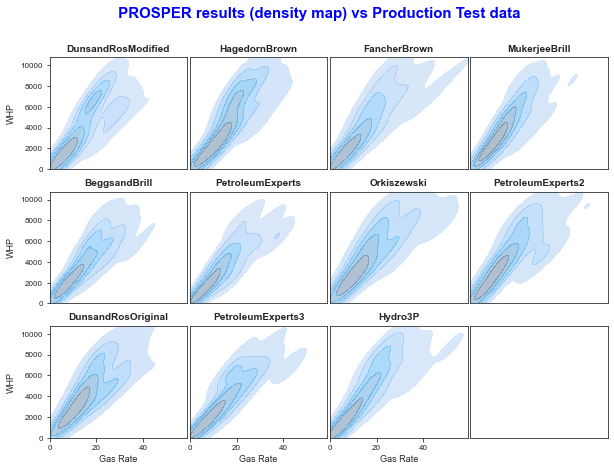

In [44]:
import math

count_corr = len(VLP_index_list)/4
max_rows = math.ceil(count_corr)
N_plots = range(max_rows*4) # total number of plots

#, ax = plt.subplots(nrows = math.ceil(count_corr), ncols=4, figsize=(10,7), layout ='constrained')
fig, ax = plt.subplots(nrows=max_rows, ncols=4, figsize=(10,7))
fig.subplots_adjust(wspace=0.02)
fig.subplots_adjust(hspace=0.2)
    
max_WHP = df_Input_sol['Sol_WHP'].max()
print(max_WHP)
max_Qg = df_Input_sol['Sol_Gas'].max()
print(max_Qg)

pcol = 0
prow = 0
corrL = 0


for plot_i in N_plots:
#for xi in VLP_index_list:   
    #print(xi)
    
    if len(VLP_index_list) > plot_i:
        xi = VLP_index_list[plot_i]

        df1 = df_Input_sol.loc[df_Input_sol['VLP_Corr'] == xi ]

        sns.kdeplot(data=df1, x="Sol_Gas", y="Sol_WHP", levels=6, fill=True, alpha=0.4, cut=2, ax=ax[prow,pcol], 
                    label='PROSPER density map');

        if use_PDP_hist == True:
            ax[prow,pcol].scatter(data= df_PDP_hist, x='Gas', y='WHP', color='gray',edgecolors= "black",linewidth=0.5, label='Production Test')

        nPlot = ax[prow,pcol]

        nPlot.set_title(VLP_names[corrL], weight='bold', fontsize=10)
        nPlot.set_ylabel('WHP', fontsize=9)
        nPlot.set_xlabel('Gas Rate', fontsize=9)
        nPlot.tick_params(axis='both', which='major', labelsize=8)
        nPlot.set_xlim(left=0, right = max_Qg)
        nPlot.set_ylim(bottom=0, top =max_WHP)
        nPlot.yaxis.tick_left()
        nPlot.xaxis.tick_bottom()

        if pcol > 0:
            nPlot.get_yaxis().set_visible(False)
        if prow < max_rows-1:
            nPlot.get_xaxis().set_visible(False)

        pcol = pcol + 1
        corrL = corrL+1
        if pcol >3:
            pcol = 0
            prow = prow + 1
    else:
        nPlot = ax[prow,pcol]
        nPlot.get_yaxis().set_visible(False)
        nPlot.get_xaxis().set_visible(False)
        print('test')
fig.suptitle(' PROSPER results (density map) vs Production Test data ', fontsize=15, weight='bold', color='blue')


<div class="alert alert-success">
<font color='black'>
    
# OUTLIERS 
  
Based on above distributions delete outliers. <br>
Specify low and high percentile to drop rows outside the limits
</font>
</div>

In [ ]:

Qg_mean = df_QP_sol['Sol_Gas'].mean()
P_mean = df_QP_sol['Sol_Pressure'].mean()

Max_P_to_drop_vals = 98
pval_to_drop = np.percentile(df_QP_sol['Sol_Gas'], Max_P_to_drop_vals)

df_QP_sol.drop(df_QP_sol[df_QP_sol.Sol_Gas > pval_to_drop].index, inplace=True)


Min_P_to_drop_vals = 2
pval_to_drop = np.percentile(df_QP_sol['Sol_Gas'], Min_P_to_drop_vals)

df_QP_sol.drop(df_QP_sol[df_QP_sol.Sol_Gas < pval_to_drop].index, inplace=True)


### Compare Stadistics ###
dfS_col_names =df_QP_All.columns.tolist()
dfS_In_col_names =df_QP_sol.columns.tolist()

df1 = pd.DataFrame(df_QP_All.describe(), columns=dfS_col_names)
df2 = pd.DataFrame(df_QP_sol.describe(), columns=dfS_In_col_names)

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('All Iteration Results')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Iterations with Solution')

display_html(df1_styler._repr_html_() + df2_styler._repr_html_(), raw=True)

p = np.percentile(df_QP_sol['Sol_Gas'], 1)
print ("Percentile 1 = ", p)
p = np.percentile(df_QP_sol['Sol_Gas'], 95)
print ("Percentile 95 = ", p)

<div class="alert alert-success">
<font color='blue'>
    
# 7. ANALYZE INPUT VALUES
#### CELL 46
***
</font>
</div>


In [ ]:
## RUN MULTIPLE CELLS ##
#Javascript("Jupyter.notebook.execute_cell_range(40,51)")

## Plot Distribution for input variables (Iterations with Solution)

Total Input Variables =  15
Rows to Plot =  8.0
Plot Distribution for input variables (Iterations with Solution)


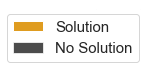

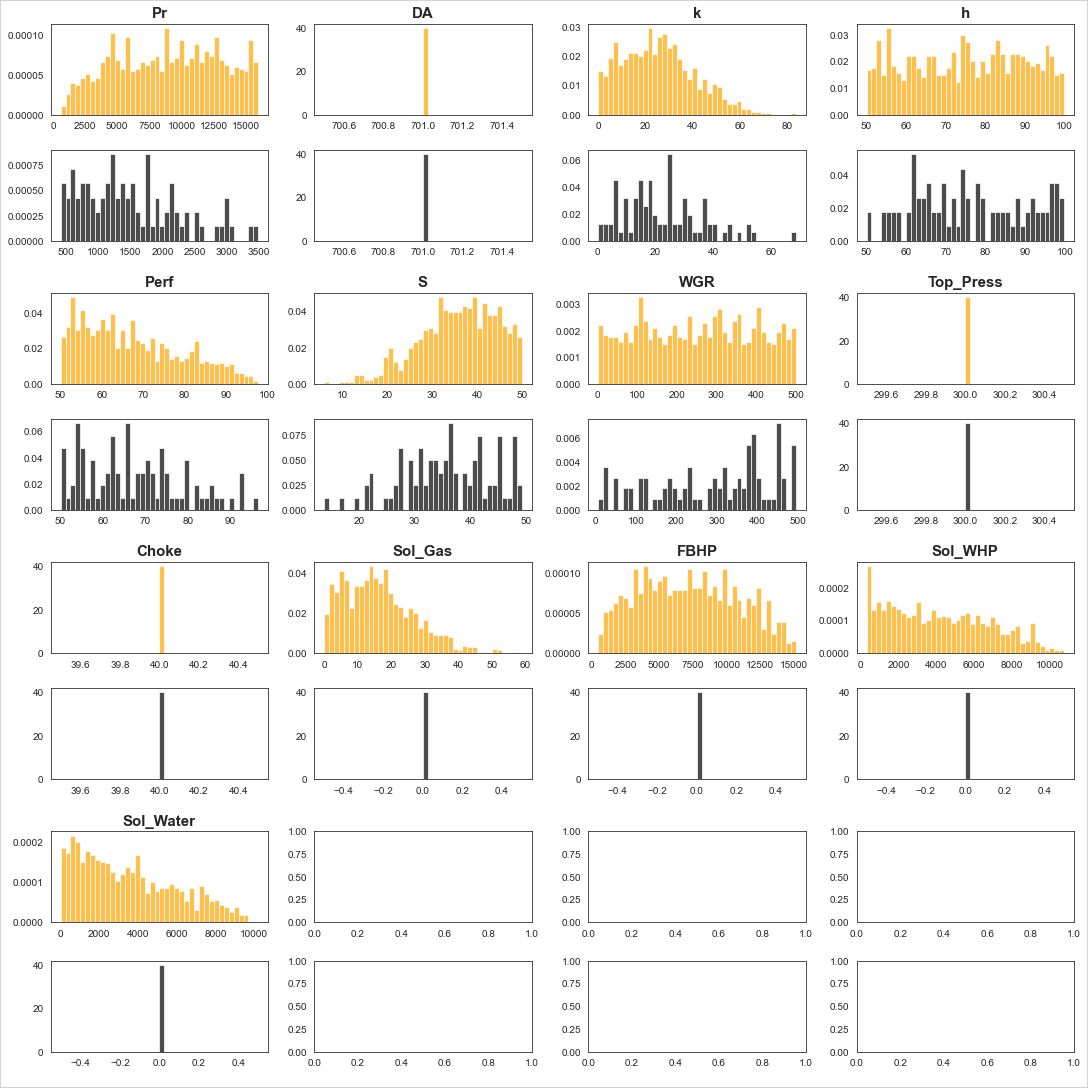

In [45]:
## Create Legend
fig, ax= plt.subplots(nrows = 1, ncols=1, figsize=(1,1))

sns.countplot(ax =ax, x=[1], color=c_orange, dodge=False, alpha=1)
sns.countplot(ax =ax, x=[1], color=c_LDark, dodge=False, alpha=0.7)
sns.countplot(ax =ax, x=[1], color='white', dodge=False, alpha=1)
#sns.move_legend(nplot, "upper left", bbox_to_anchor=(0, 1))
ax.legend(title='',labels=['Solution', 'No Solution'], facecolor='white', fontsize="15")
#ax.legend(["Solution", "No Solution"])
ax.set_xlabel('')
ax.set_ylabel('')
ax.axis('off')


## Get Column names
df_col_names_Inputs = df_Input_sol.columns.tolist()
#print(df_col_names_Inputs)

chart_n = len(df_col_names_Inputs)
print("Total Input Variables = ",chart_n)


## check rows needed to plot ##
n_rows = 4
while (n_rows < chart_n-2):
    n_rows = n_rows + 4
    
n_rows = (n_rows/4)*2
print("Rows to Plot = ",n_rows)

n_bins = 40

## Create Plots ##
fig, AX = plt.subplots(nrows = int(n_rows)-0, ncols=4, figsize=(15,15), layout ='constrained')

n = range(chart_n)

yy = 0
xx = 0
cc = 0

for ii in n:
    #print(df_col_names_Inputs[ii])
    if (df_col_names_Inputs[ii] == 'VLP_Corr' or df_col_names_Inputs[ii] == 'VLP_Corr_Name'):
        df_col_names_Inputs[ii]
    else:    
        AX[xx,yy].hist(df_Input_sol[df_col_names_Inputs[ii]], bins=n_bins, density=True, align='mid', color=c_orange, alpha=0.7)
        
        AX[xx,yy].set_title(df_col_names_Inputs[ii], weight='bold', fontsize=15)
        AX[xx,yy].set_xlabel(' ')
        AX[xx,yy].set_ylabel('')
        #AX[xx,yy].set_title('Cross-Plot Input vs Solution (Gas Rate)', weight='bold')
        
        AX[xx+1,yy].hist(df_Input_No_sol[df_col_names_Inputs[ii]], bins=n_bins, density=True, align='mid', color=c_LDark, alpha=0.7)
        AX[xx+1,yy].set_xlabel(' ')
        
        fig.patch.set_linewidth(2)
        fig.patch.set_edgecolor('lightgrey')
    
        yy = yy + 1
        cc = cc + 1

        if cc > 3:
            cc = 0
            yy = 0
            xx = xx + 2

print('Plot Distribution for input variables (Iterations with Solution)')

## Plot Distributions with solution and without solution next to each other

Total Input Variables =  15
Rows to Plot =  5


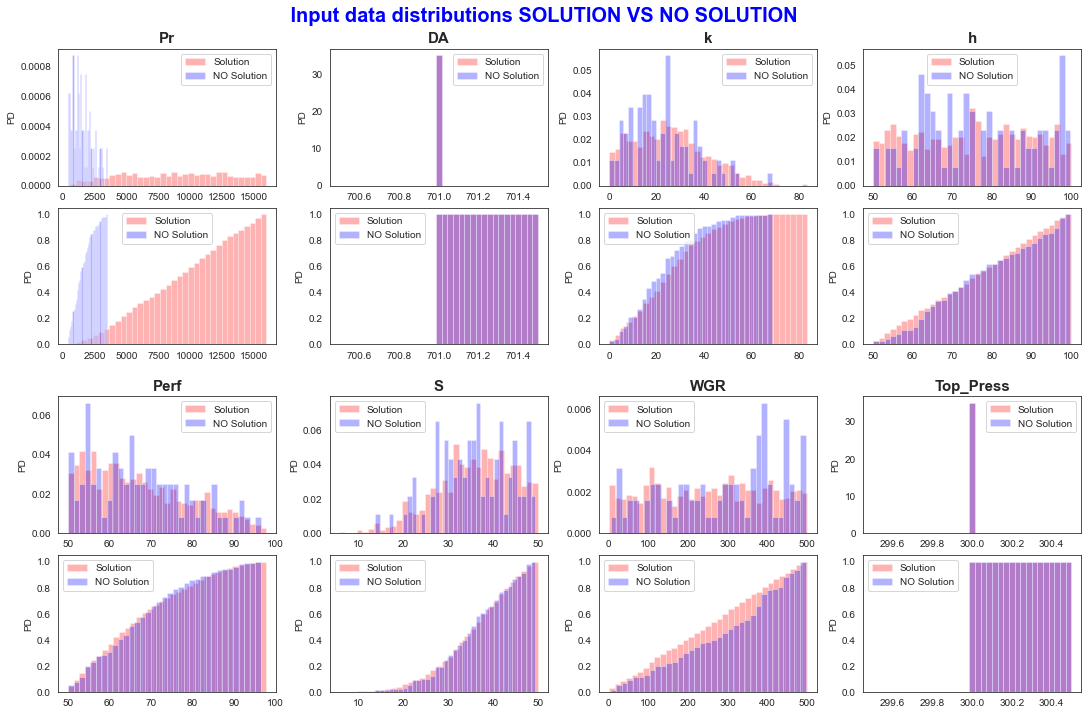

In [46]:
## Get Column names
df_col_names_Inputs = df_Input_sol.columns.tolist()
#print(df_col_names_Inputs)

chart_n = len(df_col_names_Inputs)
print("Total Input Variables = ",chart_n)


## check rows needed to plot ##
if (chart_n/3) > int(chart_n/3):
    n_rows = int(chart_n/3) + 1
if (chart_n/3) == int(chart_n/3):
    n_rows = int(chart_n/3) 
    
print("Rows to Plot = ",n_rows)

## Create Plots ##
fig, AX = plt.subplots(nrows = 4, ncols=4, figsize=(15,10), layout ='constrained')

yy = 0
xx = 0
cc = 0
n_bins = 35

for ii in range(8):
  

    if (df_Input_sol.columns[ii] == 'VLP_Corr_Name' or df_Input_sol.columns[ii] == 'VLP_Corr' \
        or df_Input_sol.columns[ii] == 'Sol_Gas' or df_Input_sol.columns[ii] == 'Sol_Pressure'):
        if1 = 0
    else:
        #print(df_Input_sol.columns[ii])
        AX[xx,yy].hist(df_Input_sol[df_col_names_Inputs[ii]], bins=n_bins, density=True, align='mid',  \
                       color=c_red, alpha=0.3, label='Solution', cumulative=False)

        AX[xx,yy].set_xlabel(df_col_names_Inputs[ii])
        AX[xx,yy].set_ylabel('PD')

        AX[xx,yy].hist(df_Input_No_sol[df_col_names_Inputs[ii]], bins=n_bins, density=True, align='mid', \
                       color=c_blue, alpha=0.3, label='NO Solution', cumulative=False)

        #AX[xx,yy].set_xlabel(df_col_names_Inputs[ii])
        AX[xx,yy].set_xlabel('')
        AX[xx,yy].legend()
        AX[xx,yy].set_title(df_col_names_Inputs[ii], weight='bold', fontsize=15)
        
        ### Plot Cumulatives ###
        AX[xx+1,yy].hist(df_Input_sol[df_col_names_Inputs[ii]], bins=n_bins, density=True, align='mid',  \
                       color=c_red, alpha=0.3, label='Solution', cumulative=True)

        AX[xx+1,yy].set_xlabel(df_col_names_Inputs[ii])
        AX[xx+1,yy].set_ylabel('PD')

        AX[xx+1,yy].hist(df_Input_No_sol[df_col_names_Inputs[ii]], bins=n_bins, density=True, align='mid', \
                       color=c_blue, alpha=0.3, label='NO Solution', cumulative=True)

        AX[xx+1,yy].set_xlabel(' ')
        AX[xx+1,yy].legend()
        
        #plt.legend()
        yy = yy + 1
        cc = cc + 1

        if cc > 3:
            cc = 0
            yy = 0
            xx = xx + 2
            
fig.suptitle(' Input data distributions SOLUTION VS NO SOLUTION ', fontsize=20, weight='bold', color='blue');

<font color='blue'>
    
# Compare distributions using Two-Sample Kolmogorov-Smirnov test

    
***
</font>

The null hypothesis (H<sub> 0 </sub>)  is that 2 independent samples are drawn from the same continuous distribution.
. <br>
p-value < 0.05: significant difference between the two distributions



In [47]:
# Create DataFrame to contain KS results
df_KS_test = pd.DataFrame(columns = ['Variable Name', 'Statistic', 'p value', 'Result'])
print(type(n))

for ii in n:
    test_vals = stats.ks_2samp(df_Input_sol[df_col_names_Inputs[ii]],df_Input_No_sol[df_col_names_Inputs[ii]])
    #print(df_col_names_Inputs[ii])
    print(df_col_names_Inputs[ii], ' = ', test_vals)
    
    a = df_col_names_Inputs[ii]
    b = round(test_vals[0],4)
    cx = round(test_vals[1],6)
    
    if cx < 0.05:
        d = 'H0 rejected, Significant difference'
    else:
        d = 'H0 not rejected'
    df_KS_test.loc[len(df_KS_test.index)] = [a,b,cx,d]
    
df_KS_test

def highlight(s):
    if s.Result != 'H0 not rejected':
        return ['background-color: yellow'] * len(s)
    else:
        return ['background-color: white'] * len(s)

df_KS_test.style.apply(highlight, axis=1)

<class 'range'>
Pr  =  KstestResult(statistic=0.88998899889989, pvalue=1.1102230246251565e-15)
DA  =  KstestResult(statistic=0.0, pvalue=1.0)
k  =  KstestResult(statistic=0.1367884041151368, pvalue=0.08194859520738418)
h  =  KstestResult(statistic=0.09805486043109805, pvalue=0.37911186662319274)
Perf  =  KstestResult(statistic=0.05976861422405977, pvalue=0.9102377844694942)
S  =  KstestResult(statistic=0.06314147898306315, pvalue=0.873581993644559)
WGR  =  KstestResult(statistic=0.16892128773316892, pvalue=0.01533466850584253)
Top_Press  =  KstestResult(statistic=0.0, pvalue=1.0)
VLP_Corr  =  KstestResult(statistic=0.10372465818010372, pvalue=0.31288003209866944)
VLP_Corr_Name  =  KstestResult(statistic=0.12229354803612229, pvalue=0.1550366388184108)
Choke  =  KstestResult(statistic=0.0, pvalue=1.0)
Sol_Gas  =  KstestResult(statistic=1.0, pvalue=1.1102230246251565e-15)
FBHP  =  KstestResult(statistic=1.0, pvalue=1.1102230246251565e-15)
Sol_WHP  =  KstestResult(statistic=1.0, pvalue=1.1

,Variable Name,Statistic,p value,Result
0,Pr,0.890000,0.000000,"H0 rejected, Significant difference"
1,DA,0.000000,1.000000,H0 not rejected
2,k,0.136800,0.081949,H0 not rejected
3,h,0.098100,0.379112,H0 not rejected
4,Perf,0.059800,0.910238,H0 not rejected
5,S,0.063100,0.873582,H0 not rejected
6,WGR,0.168900,0.015335,"H0 rejected, Significant difference"
7,Top_Press,0.000000,1.000000,H0 not rejected
8,VLP_Corr,0.103700,0.312880,H0 not rejected
9,VLP_Corr_Name,0.122300,0.155037,H0 not rejected


<font color='blue'>
    
# 8. Create cross-plots input vs solutions
CELL 51
***
</font>



In [ ]:
## RUN MULTIPLE CELLS ##
Javascript("Jupyter.notebook.execute_cell_range(56,61)")

In [48]:
## Get Column names
df_col_names =df_VLP_IPR.columns.tolist()
df_col_names_In = df_Input_All.columns.tolist()
print(df_col_names_In)

['Pr', 'DA', 'k', 'h', 'Perf', 'S', 'WGR', 'Top_Press', 'VLP_Corr', 'VLP_Corr_Name', 'Choke', 'Sol_Gas', 'FBHP', 'Sol_WHP', 'Sol_Water']


## Cross-plots for all Iterations

Total Input Variables =  15
Rows to Plot =  5


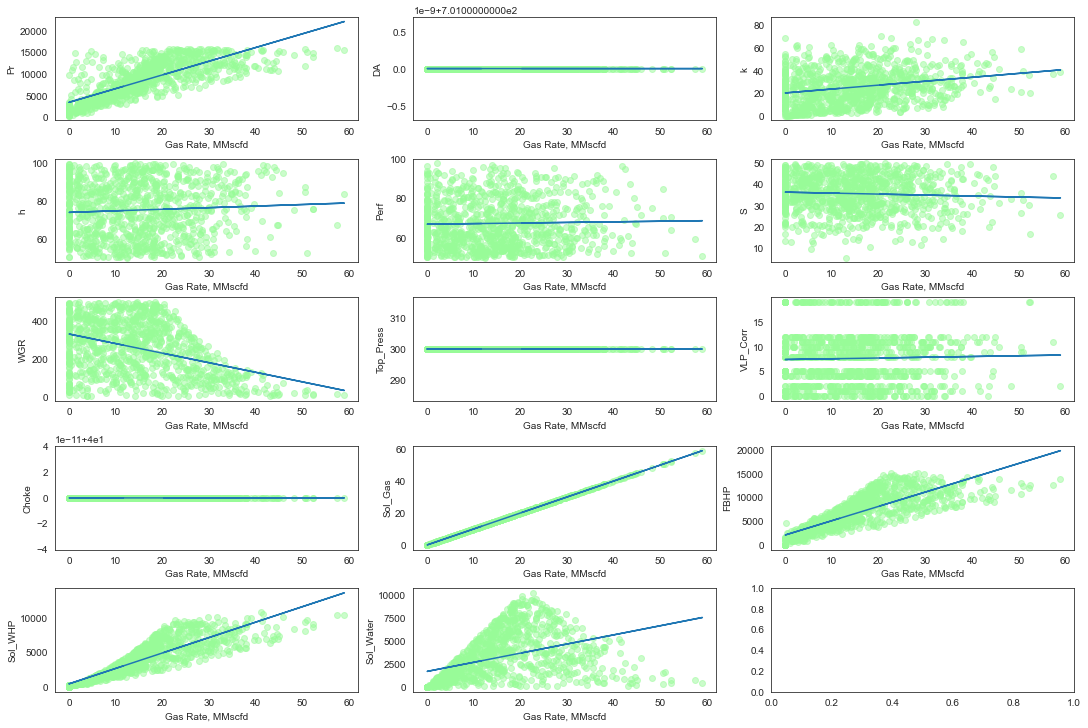

In [49]:
chart_n = len(df_col_names_In)
print("Total Input Variables = ",chart_n)


## check rows needed to plot ##
if (chart_n/3) > int(chart_n/3):
    n_rows = int(chart_n/3) + 1
if (chart_n/3) == int(chart_n/3):
    n_rows = int(chart_n/3) 
    
print("Rows to Plot = ",n_rows)

## Create Plots ##
fig, AX = plt.subplots(nrows = int(n_rows), ncols=3, figsize=(15,10), layout ='constrained')

n = range(chart_n)
yy = 0
xx = 0
cc = 0

for ii in n:
    #print(df_Input_All.columns[ii])
    
    if df_Input_All.columns[ii] != 'VLP_Corr_Name':
        AX[xx,yy].scatter(df_Input_All['Sol_Gas'], df_Input_All[df_col_names_In[ii]], color=c_pale_green, alpha=0.5)
        AX[xx,yy].set_xlabel('Gas Rate, MMscfd')
        AX[xx,yy].set_ylabel(df_col_names_In[ii])
        #AX[xx,yy].set_title('Cross-Plot Input vs Solution (Gas Rate)', weight='bold')

        # Fit with polyfit - from numpy.polynomial.polynomial import polyfit
        x = df_Input_All['Sol_Gas']
        y = df_Input_All[df_col_names_In[ii]]
        b, m = np.polynomial.polynomial.polyfit(x,y, 1)


        AX[xx,yy].plot(x, b + m * x, '-')

        yy = yy + 1
        cc = cc + 1

        if cc > 2:
            cc = 0
            yy = 0
            xx = xx + 1


## Cross-Plots for Iterations with solutions

Total Input Variables =  15
Rows to Plot =  5


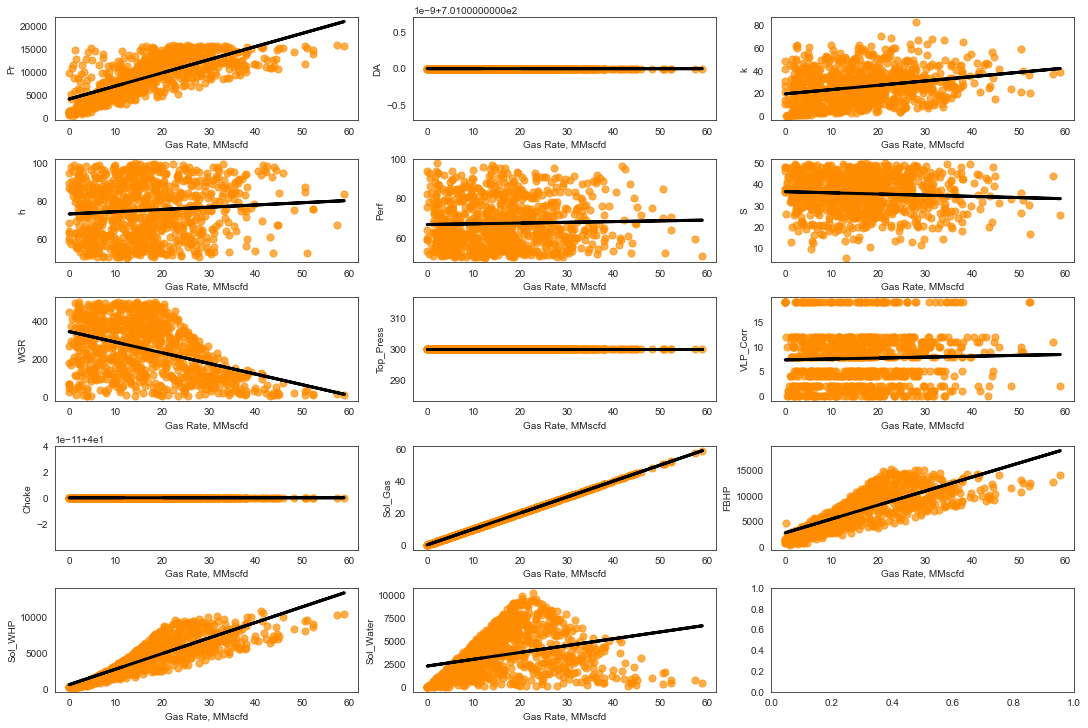

In [50]:
chart_n = len(df_col_names_In)
print("Total Input Variables = ",chart_n)


## check rows needed to plot ##
if (chart_n/3) > int(chart_n/3):
    n_rows = int(chart_n/3) + 1
if (chart_n/3) == int(chart_n/3):
    n_rows = int(chart_n/3) 
    
print("Rows to Plot = ",n_rows)

## Create Plots ##
fig, AX = plt.subplots(nrows = int(n_rows), ncols=3, figsize=(15,10), layout ='constrained')

n = range(chart_n)
yy = 0
xx = 0
cc = 0

for ii in n:
    #print(ii)
    if df_Input_sol.columns[ii] != 'VLP_Corr_Name':
        AX[xx,yy].scatter(df_Input_sol['Sol_Gas'], df_Input_sol[df_col_names_In[ii]], color=(255/255, 140/255, 0/255), alpha=0.7, s = 50)
        AX[xx,yy].set_xlabel('Gas Rate, MMscfd')
        AX[xx,yy].set_ylabel(df_col_names_In[ii])
        #AX[xx,yy].set_title('Cross-Plot Input vs Solution (Gas Rate)', weight='bold')

        # Fit with polyfit - from numpy.polynomial.polynomial import polyfit
        x = df_Input_sol['Sol_Gas']
        y = df_Input_sol[df_col_names_In[ii]]
        b, m = np.polynomial.polynomial.polyfit(x,y, 1)


        AX[xx,yy].plot(x, b + m * x, '-', linewidth=3, color = c_black)

        yy = yy + 1
        cc = cc + 1

        if cc > 2:
            cc = 0
            yy = 0
            xx = xx + 1

<font color='blue'>
    
# 9. CALCULATE CORRELATION COEFFICIENTS
***
</font>

In [ ]:
## RUN MULTIPLE CELLS ##
Javascript("Jupyter.notebook.execute_cell_range(61,66)")

In [51]:
# Create new DF to delete Correlation name
corr_DF = df_Input_All.copy(deep=True)
corr_DF.drop(['VLP_Corr_Name'], axis=1, inplace=True) # delete Correlation name (string variable)
## Check statistics for new DataFrame
corr_DF.describe().round(2)

,Pr,DA,k,h,Perf,S,WGR,Top_Press,VLP_Corr,Choke,Sol_Gas,FBHP,Sol_WHP,Sol_Water
count,1000.00,1000.0,1000.00,1000.00,1000.00,1000.00,1000.00,1000.0,1000.00,1000.0,1000.00,1000.00,1000.00,1000.00
mean,8226.03,701.0,25.39,75.21,67.37,35.73,255.47,300.0,7.63,40.0,14.86,6573.35,3774.40,3174.75
std,4436.81,0.0,15.11,14.30,12.02,8.44,142.97,0.0,5.39,0.0,11.10,4063.16,2788.34,2588.71
min,414.40,701.0,0.03,50.00,50.00,5.80,2.10,300.0,0.00,40.0,0.00,0.00,0.00,0.00
25%,4505.62,701.0,13.78,62.60,57.08,30.20,126.62,300.0,4.00,40.0,5.66,3254.74,1330.05,906.03
50%,8370.80,701.0,24.40,75.20,65.35,36.40,262.40,300.0,8.00,40.0,13.90,6550.92,3457.10,2612.90
75%,12026.70,701.0,34.65,87.52,75.90,42.30,380.90,300.0,11.00,40.0,21.42,9778.78,5984.98,5024.43
max,15973.30,701.0,83.50,100.00,97.80,49.90,499.80,300.0,19.00,40.0,58.93,15154.61,10770.29,10220.44


,Variable,Sol Gas Corr
0,Pr,0.792
1,k,0.254
2,h,0.065
3,Perf,0.028
4,S,-0.060
5,WGR,-0.393
6,VLP_Corr,0.031
7,Sol_Water,0.425


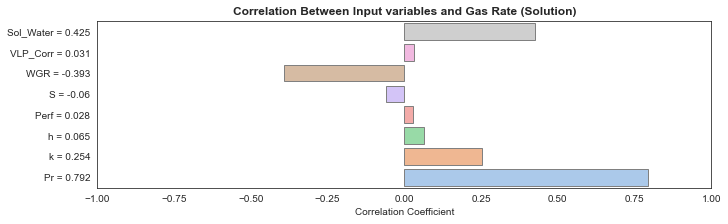

In [52]:
## Calculate correlation parameters PANDAS
corr_DF_Coeff = corr_DF.corr()

Gas_Sol_Coeff = corr_DF_Coeff['Sol_Gas']
### Convert Series to DataFrame 
Gas_Sol_Coeff_df = pd.Series.to_frame(Gas_Sol_Coeff)

### Drop Calculated variables (Sol_Gas, FBHP, Sol_WHP) Row and NaN values ###
Gas_Sol_Coeff_df = Gas_Sol_Coeff_df.dropna()
Gas_Sol_Coeff_df = Gas_Sol_Coeff_df.drop(['Sol_Gas'], errors='ignore')
Gas_Sol_Coeff_df = Gas_Sol_Coeff_df.drop(['FBHP'], errors='ignore')
Gas_Sol_Coeff_df = Gas_Sol_Coeff_df.drop(['Sol_WHP'], errors='ignore')

Gas_Sol_Coeff_df.reset_index(inplace=True)
Gas_Sol_Coeff_df.columns = ['Variable', 'Sol Gas Corr']
Gas_Sol_Coeff_df['Sol Gas Corr'] = Gas_Sol_Coeff_df['Sol Gas Corr'].round(3)


display(Gas_Sol_Coeff_df)

fig, ax = plt.subplots(nrows = 1, ncols=1, figsize=(10,3), layout ='constrained')

Input_Var_Names = Gas_Sol_Coeff_df['Variable'] + ' = ' + Gas_Sol_Coeff_df['Sol Gas Corr'].astype(str)

#ax.barh(Input_Var_Names, Gas_Sol_Coeff_df['Sol Gas Corr'], align='center', color='tab:green', alpha=0.5, edgecolor='black')

sns.barplot(y=Input_Var_Names, x=Gas_Sol_Coeff_df['Sol Gas Corr'], ax=ax, orient="h", palette='pastel', 
            edgecolor='gray')

ax.set_xlim(-1, 1)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Correlation Coefficient')
ax.set_title('Correlation Between Input variables and Gas Rate (Solution)', weight='bold', fontsize=12);

In [ ]:
norm = plt.Normalize(-1, 1)
norm

<font color='blue'>
    
# 10. PLOT IPR VS VLP
***
</font>

In [ ]:
## RUN MULTIPLE CELLS ##
Javascript("Jupyter.notebook.execute_cell_range(68,73)")

In [ ]:
df_VLP_IPR.describe().round(2)

## Plot VLP and IPR for specific Iteration (Index_TP)

In [ ]:
df = df_VLP_IPR

def Plot_Vlp_vs_IPR(Index_TP=0):
    
    #Index_TP = 341 ## Specify iteration to plot VLP, IPR and Solution

    ## Get Column names
    df_col_names =df.columns.tolist()

    print('Iteration Index: ', Index_TP)
    print('IPR col name: ', df_col_names[Index_TP*3])
    print('VLP col name: ', df_col_names[(Index_TP*3)+1])

    fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(15,5), layout ='constrained')

    ax[0].plot(df[df_col_names[Index_TP*3]], df[df_col_names[(Index_TP*3)+1]], c='blue', label = 'IPR', 
             marker = 'o',markerfacecolor=(173/255, 188/255, 230/255))

    ax[0].plot(df[df_col_names[Index_TP*3]], df[df_col_names[(Index_TP*3)+2]], c='black', label = 'VLP', marker = 'o',
             markerfacecolor=(192/255, 192/255, 192/255))

    ax[0].plot(df_Input_All['Sol_Gas'].iloc[Index_TP], df_Input_All['FBHP'].iloc[Index_TP], label='Solution', marker = 'o', 
             markersize = 12,linestyle= '',
             markerfacecolor=(255/255, 140/255, 0/255) )

    ax[0].set_xlabel('Gas Rate, MMscfd')
    ax[0].set_ylabel('Pressure, psi')
    ax[0].set_title('VLP vs IPR', weight='bold', color=(0/255, 0/255, 255/255))
    ax[0].legend()
    ax[0].set_xlim(left=0)



    ### Second Chart ###
    ax[1].plot(df[df_col_names[Index_TP*3]], df[df_col_names[(Index_TP*3)+1]], c='blue', label = 'IPR', 
             marker = 'o',markerfacecolor=(173/255, 188/255, 230/255))

    ax[1].plot(df[df_col_names[Index_TP*3]], df[df_col_names[(Index_TP*3)+2]], c='black', label = 'VLP', marker = 'o',
             markerfacecolor=(192/255, 192/255, 192/255))

    ax[1].plot(df_Input_All['Sol_Gas'].iloc[Index_TP], df_Input_All['FBHP'].iloc[Index_TP], label='Solution', marker = 'o', 
             markersize = 12,linestyle= '',
             markerfacecolor=(255/255, 140/255, 0/255) )

    ax[1].set_xlabel('Gas Rate, MMscfd')
    ax[1].set_ylabel('Pressure, psi')
    ax[1].set_title('VLP vs IPR (zoom)', weight='bold', color=(0/255, 0/255, 255/255))
    ax[1].legend()
    ax[1].set_xlim(left=0)

    P_max = df[df_col_names[(Index_TP*3)+1]].max()
    ax[1].set_ylim(top=P_max+1000)

    #ax[0,0].grid(color = c_black, linestyle = '--', linewidth = 0.1)

    #str_text = 'Mean: '+ str(np.round(Sol_Gas_mean, decimals = 2))
    #ax[1,0].annotate(str_text, (Sol_Gas_mean+0.2, Sol_Gas_pdf_mean));

    print("Gas Solution = ", df_Input_All['Sol_Gas'].iloc[Index_TP])
    print("Pressure Solution = ", df_Input_All['FBHP'].iloc[Index_TP])
    print('---')
    print("Pr = ", df_Input_All['Pr'].iloc[Index_TP])
    print("k = ", df_Input_All['k'].iloc[Index_TP])
    print("h = ", df_Input_All['h'].iloc[Index_TP])
    print("Perf = ", df_Input_All['Perf'].iloc[Index_TP])
    print("WGR = ", df_Input_All['WGR'].iloc[Index_TP])
    print("S = ", df_Input_All['S'].iloc[Index_TP])
    

In [ ]:
# call function and widget to visualize VLP vs IPR curves for specific Index
widgets.interact(Plot_Vlp_vs_IPR, Index_TP=(0,iter,1))


## 9.2 Plot multiple (IPR + VLP) curves

### For high iteration number it does not make sense to plot all IPR/VLP curves

In [ ]:
## Get Column names
df_col_names =df.columns.tolist()
#print(df_col_names)
#print(df_col_names[1])

n = range(iter)
Qg_i = 0
ipr_i = 2
vlp_i = 1
for i in n:

    plt.plot(df[df_col_names[Qg_i]], df[df_col_names[ipr_i]], c='green', label=df_col_names[ipr_i], alpha=0.5)
    plt.plot(df[df_col_names[Qg_i]], df[df_col_names[vlp_i]], c='black', label=df_col_names[vlp_i], alpha=0.5)
    ipr_i = ipr_i + 3
    vlp_i = vlp_i + 3
    Qg_i =  Qg_i + 3
    
plt.xlabel('Gas Rate, MMscfd')
plt.ylabel('Pressure, psi')
plt.title('VLP vs IPR', weight='bold', color=(0/255, 0/255, 255/255))
plt.xlim(left=0)
plt.ylim(bottom=0)



x = np.percentile(df_Input_sol['Sol_Gas'], 90)
y = np.percentile(df_Input_sol['FBHP'], 90)
plt.plot(x, y, label='Solution', marker = 'o', markersize = 12,linestyle= '', color=c_black, markerfacecolor=c_red )
print(x)
print(y)

x = np.percentile(df_Input_sol['Sol_Gas'], 10)
y = np.percentile(df_Input_sol['FBHP'], 10)
plt.plot(x, y, label='Solution', marker = 'o', markersize = 12,linestyle= '', color=c_black, markerfacecolor=c_red )
print(x)
print(y)

x = np.percentile(df_Input_sol['Sol_Gas'], 50)
y = np.percentile(df_Input_sol['FBHP'], 50)
plt.plot(x, y, label='Solution', marker = 'o', markersize = 12,linestyle= '', color=c_black, markerfacecolor=c_red )
print(x)
print(y)

P_max = df_Input_sol['FBHP'].max()
plt.ylim(top=P_max+500)

plt.show()

<div class="alert alert-success">
<font color='blue'>
    
# Run sensitivity for each variable
#### CELL ...
***
</font>
</div>


In [ ]:
def Generate_sens_values(var_name, test_val=0):

    i_mean, i_SD = Input_var_dict[var_name][2], Input_var_dict[var_name][3]
    i_Low_limit, i_High_limit = Input_var_dict[var_name][0], Input_var_dict[var_name][1]
    i_constant = Input_var_dict[var_name][4]
    i_x_Label, i_Title = Input_var_dict[var_name][6], Input_var_dict[var_name][6]
    i_Dist_Type = Input_var_dict[var_name][5]
        
    ## generate data for truncated normal distribution
    if i_Dist_Type == 'Constant':
        NT_Samples = [i_constant]
        
    if i_Dist_Type == 'Uniform':
        NT_Samples = np.random.uniform(low = i_Low_limit, high = i_High_limit, size = 1)
        
    if i_Dist_Type == 'Normal':
        NT_Samples = stats.truncnorm.rvs((i_Low_limit-i_mean)/i_SD,(i_High_limit-i_mean)/i_SD, loc=i_mean, scale=i_SD, size=1)
    
    if var_name=='Perf':
        if test_val < NT_Samples:
            #print(test_val)
            NT_Samples = test_val
    
    #print(NT_Samples)
    
    NT_Samples = np.around(NT_Samples,2)
    my_dict_input_vals[var_name].extend(NT_Samples)
    
    return NT_Samples

In [ ]:


iter = 1500                             ## Set iterations


## Create Dictionaries to fill inputs, results ##
## Everytime this cell is run the dictionary variables are reset ##

my_dict = defaultdict(list)             # dictionary to save VLP and IPR Curves
my_dict_input_vals = defaultdict(list)  # dictionary to save Inputs/Solutions 


## Check if OpenServer Lic is open
if 'c' in locals():
    print('c is active')
else:
    c = OpenServer()
    
c.connect()

var_sense_list = ['Pr']
#n = range(iter)

var_sense_n = var_sense_list
for i in range(iter):
    
    #print('Index: ', i)
        
    Rand_val = Generate_sens_values('Pr')                      ## Reservoir Pressure ##
    c.DoSet('PROSPER.SIN.IPR.Single.Pres', Rand_val)        # Change variable on PROSPER
    
    Rand_val = Generate_sens_values('DA')                      ### DRAINAGE AREA ###
    c.DoSet('PROSPER.SIN.IPR.Single.Drainage', Rand_val)    # Change variable on PROSPER    
    
    Rand_val = Generate_sens_values('k')                       ### PERMEABILITY ###
    c.DoSet('PROSPER.SIN.IPR.Single.ResPerm', Rand_val)     # Change variable on PROSPER       
    
    Rand_val = Generate_sens_values('h')                       ### Reservoir Height ###
    c.DoSet('PROSPER.SIN.IPR.Single.Thickness', Rand_val)   # Change variable on PROSPER     
    #test_val = Rand_val
    
    Rand_val = Generate_sens_values('Perf', Rand_val)          ## Perforation Interval ##
    c.DoSet('PROSPER.SIN.IPR.Single.PerfInt', Rand_val)     # Change variable on PROSPER      
   
    Rand_val = Generate_sens_values('S')                       ### SKIN ###
    c.DoSet('PROSPER.SIN.IPR.Single.Skin', Rand_val)        # Change variable on PROSPER    
 
    Rand_val = Generate_sens_values('WGR')                     ### WGR ###
    c.DoSet('PROSPER.SIN.IPR.Single.WGR', Rand_val)         # Change variable on IPR  
    c.DoSet('PROSPER.ANL.SYS.WGR', Rand_val)                # Change variable on System  
    
    Rand_val = Generate_sens_values('Top_Press')               ### WGR ###
    c.DoSet('PROSPER.ANL.SYS.Pres', Rand_val)               # Change variable on PROSPER  

  


    ### VLP Correlation ###
    if VLP_corr_status == True:
        VLP_Index_sample = np.random.choice(VLP_index_list, 1)
        
        
        index_vlp = VLP_index_list.index(VLP_Index_sample)
        VLP_Index_sample_Name = VLP_names[index_vlp]
        VLP_Index_sample_Name =[VLP_Index_sample_Name]
        
        my_dict_input_vals['VLP_Corr'].extend(VLP_Index_sample)
        my_dict_input_vals['VLP_Corr_Name'].extend(VLP_Index_sample_Name)
        
        c.DoSet('PROSPER.ANL.SYS.TubingLabel', VLP_Index_sample)
          
    else:
        my_dict_input_vals['VLP_Corr'].extend(100)
        my_dict_input_vals['VLP_Corr_Name'].extend(100)
        

        
    ### WELL CHOKE ###
    Choke = np.random.choice(Choke_list, 1)      
    my_dict_input_vals['Choke'].extend(Choke)         
    c.DoSet('PROSPER.SIN.EQP.Surf.Data[1].ID', Choke/64)
    
    
    
    ### Calculate new IPR ### Required after changing IPR variables ###
    c.DoCmd('PROSPER.IPR.CALC')
    
    
    
    ## Calculate Well model 
    c.DoCmd('PROSPER.ANL.SYS.CALC')

    ## Extract Solution from PROSPER
    ## Some variable strings change based on PROSPER version
    Gas_Curve = c.DoGet('PROSPER.OUT.SYS.Results[0].GasRate[$]')
    IPR_Curve = c.DoGet('PROSPER.OUT.SYS.Results[0].IPRpres[$]')
    VLP_Curve = c.DoGet('PROSPER.OUT.SYS.Results[0].VLPpres[$]')
    
    Gas_Sol = c.DoGet('PROSPER.OUT.SYS.Results[0].Sol.GasRate')
    BHP_SOL = c.DoGet('PROSPER.OUT.SYS.Results[0].Sol.BHP')
    
    WHP_SOL = c.DoGet('PROSPER.OUT.SYS.SOL[0].WHP')  
    #WHP_SOL = c.DoGet('PROSPER.OUT.SYS.Results[0].Sol.WHPressure') 
    
    Gas_AOF = c.DoGet('Prosper.SIN.IPR.Single.AOF')
    
    
    if Gas_Sol > 1000000:
        Gas_Sol = 0
        BHP_SOL = 0
        WHP_SOL = 0
    
    # Add solutions to dictionary
    my_dict_input_vals['Sol_Gas'].extend([Gas_Sol])
    my_dict_input_vals['FBHP'].extend([BHP_SOL])
    my_dict_input_vals['Sol_WHP'].extend([WHP_SOL])
    
    ## Add  VLP + IPR to Dictionary
    my_dict[str(i) + '_G'].extend(Gas_Curve)
    my_dict[str(i) + '_IPR'].extend(IPR_Curve)
    my_dict[str(i) + '_VLP'].extend(VLP_Curve)
    
    
    # Print values while iterating
    print_input_and_solutions()

    
c.disconnect


<div class="alert alert-success">
<font color='blue'>
    
# CREATE POWERPOINT PRESENTATION

***
</font>
</div>


In [ ]:
from pptx import Presentation
X = Presentation()

In [ ]:
Layout = X.slide_layouts[0] 
first_slide = X.slides.add_slide(Layout) # Adding first slide
first_slide.shapes.title.text = "Creating a powerpoint using Python"

first_slide.placeholders[1].text = "Created by Tutorialpoints"
X.save("First_presentation.pptx")